<a href="https://colab.research.google.com/github/JulioXa69/Thesis_Public_Repository/blob/Thesis/Tesis_Maestria_Ing_Julio_Hallo_201020022065_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Raw Data Set Construction***

## **Data Corpus Analysis and Data Set Construction**
2020-07-12
JXHALLO: Construction and Review of data sets in order to know if they are independent. Processing Raw Data from:

Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/

Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html

 ***Raw Data Set Outputs:***
* TestDataSet
* TrainDataSet
* NonDupTest
* DupTest
* NonDupTrain
* DupTrain

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x

In [ ]:
# 4- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_gs.json"

df1 = pd.read_json(url, #compression='gzip'
                  lines=True)

In [ ]:
df1.shape


In [ ]:
# 5- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_train/all_train_small.json.gz"

df2 = pd.read_json(url, compression='gzip',lines=True)

df2.shape

In [ ]:
Left_join = pd.merge(df2,  
                     df1,  
                     on ='pair_id',  
                     how ='left') 
Left_join 

In [ ]:
Left_join.shape

In [ ]:
Left_join.isnull().sum()

In [ ]:
# 6- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_train/all_train_medium.json.gz"

df3 = pd.read_json(url, compression='gzip',lines=True)

df3.shape

In [ ]:
# 7- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_train/all_train_large.json.gz"

df4 = pd.read_json(url, compression='gzip',lines=True)

df4.shape

In [ ]:
# 8- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_train/all_train_xlarge.json.gz"

df5 = pd.read_json(url, compression='gzip',lines=True)

df5.shape

In [ ]:
Left_join_xl_l = pd.merge(df5,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_l
Left_join_xl_l.isnull().sum()

In [ ]:
Left_join_l_m = pd.merge(df4,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_m.isnull().sum()

In [ ]:
Left_join_l_m = pd.merge(df4,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_m.isnull().sum()

In [ ]:
Left_join_m_gs = pd.merge(df3,  
                     df1,  
                     on ='pair_id',  
                     how ='left') 
Left_join_m_gs.shape 
Left_join_m_gs.isnull().sum()

In [ ]:
Left_join_l_gs = pd.merge(df4,  
                     df1,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_gs.shape
Left_join_l_gs.isnull().sum()

In [ ]:
Left_join_xl_gs = pd.merge(df5,  
                     df1,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_gs.shape

In [ ]:
Left_join_xl_gs.isnull().sum()

In [ ]:
Left_join_xl_s = pd.merge(df5,  
                     df2,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_s.shape

In [ ]:
Left_join_xl_s.isnull().sum()

In [ ]:
Left_join_xl_m = pd.merge(df5,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_m.shape

In [ ]:
Left_join_xl_m.isnull().sum()

In [ ]:
Left_join_xl_l = pd.merge(df5,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_l.shape

In [ ]:
Left_join_xl_l.isnull().sum()

In [ ]:
Left_join_xl_xl = pd.merge(df5,  
                     df5,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_xl.shape

In [ ]:
Left_join_xl_xl.isnull().sum()

In [ ]:
Left_join_l_s = pd.merge(df4,  
                     df2,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_s.shape

In [ ]:
Left_join_l_s.isnull().sum()

In [ ]:
Left_join_l_m = pd.merge(df4,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_m.shape

In [ ]:
Left_join_l_m.isnull().sum()

In [ ]:
Left_join_l_l = pd.merge(df4,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_l.shape

In [ ]:
Left_join_l_l.isnull().sum()

In [ ]:
Left_join_l_xl = pd.merge(df4,  
                     df5,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_xl.shape

In [ ]:
Left_join_l_xl.isnull().sum()

In [ ]:
Left_join_m_s = pd.merge(df3,  
                     df2,  
                     on ='pair_id',  
                     how ='left') 
Left_join_m_s.shape

In [ ]:
Left_join_m_s.isnull().sum()

In [ ]:
Left_join_m_l = pd.merge(df3,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_m_l.shape

In [ ]:
Left_join_m_l.isnull().sum()

In [ ]:
Left_join_m_xl = pd.merge(df3,  
                     df5,  
                     on ='pair_id',  
                     how ='left') 
Left_join_m_xl.shape

In [ ]:
Left_join_m_xl.isnull().sum()

In [ ]:
Left_join_s_m = pd.merge(df2,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_s_m.shape

In [ ]:
Left_join_s_m.isnull().sum()

In [ ]:
Left_join_s_l = pd.merge(df2,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_s_l.shape

In [ ]:
Left_join_s_l.isnull().sum()

In [ ]:
Left_join_s_xl = pd.merge(df2,  
                     df5,  
                     on ='pair_id',  
                     how ='left') 
Left_join_s_xl.shape

In [ ]:
Left_join_s_xl.isnull().sum()

In [ ]:
# 9- JXHALLO Append All Dataframes

# all_train_xlarge_sample.json.gz, all_train_large.json.gz, all_train_medium.json.gz, all_train_small.json.gz
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-07-12



In [ ]:
AppendedDataFile = df5.append(df4)
AppendedDataFile.shape

In [ ]:
AppendedDataFile = AppendedDataFile.append(df3)
AppendedDataFile.shape

In [ ]:
AppendedDataFile = AppendedDataFile.append(df2)
AppendedDataFile.shape

In [ ]:
TotalRecords = 214736+103411+25567+9038
print (TotalRecords)

In [ ]:
AppendedDataFile.isnull().sum()

In [ ]:
AppendedDataFile.sort_values("pair_id", inplace=True)

In [ ]:
AppendedDataFile.drop_duplicates(subset ="pair_id", keep='first', inplace=True)
AppendedDataFile.isnull().sum()

In [ ]:
AppendedDataFile.shape

In [ ]:
print (AppendedDataFile.query('label == "1"').label.count())

In [ ]:
print (AppendedDataFile.query('label == "0"').label.count())

In [ ]:
#2020-07-20 Saviing AppendedDataFile using pickle
AppendedDataFile.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/AppendedDataFile.pkl')

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
AppendedDataFile=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/AppendedDataFile.pkl')

In [ ]:
print(AppendedDataFile.shape)

In [ ]:
AppendedDataFile.describe()

In [ ]:
AppendedDataFile

In [ ]:
print (AppendedDataFile.query('category_left == "Jewelry"').label.count())

In [ ]:
AppendedDataFile['category_left'].value_counts().plot(kind='bar')

In [ ]:
AppendedDataFile['category_right'].value_counts().plot(kind='bar')

In [ ]:
AppendedDataFile['label'].value_counts('')

In [ ]:
AppendedDataFile['category_left'].value_counts()

In [ ]:
subset_df = AppendedDataFile[(AppendedDataFile["category_right"] == 'Computers_and_Accessories')&(AppendedDataFile["label"] == 0)]

In [ ]:
subset_df.shape

In [ ]:
subset_df = subset_df[(subset_df["label"] == 1)]
subset_df.shape

In [ ]:
# 2020-07-20: Create Dataframe with lable = 1 of all four categories
# Computers_and_Accessories_Dup
# Shoes
# Camera_and_Photo
# Jewelry
# Save into pickle
Computers_and_Accessories_Dup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Computers_and_Accessories')&(AppendedDataFile["label"] == 1)]
Shoes_Dup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Shoes')&(AppendedDataFile["label"] == 1)]
Camera_and_Photo_Dup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Camera_and_Photo')&(AppendedDataFile["label"] == 1)]
Jewelry_Dup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Jewelry')&(AppendedDataFile["label"] == 1)]
print("Computers_and_Accessories_Dup.shape")
print(Computers_and_Accessories_Dup.shape)
print("Shoes_Dup.shape")
print(Shoes_Dup.shape)
print("Camera_and_Photo_Dup.shape")
print(Camera_and_Photo_Dup.shape)
print("Jewelry_Dup.shape")
print(Jewelry_Dup.shape)

In [ ]:
Computers_and_Accessories_Dup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_Dup.pkl')
Shoes_Dup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_Dup.pkl')
Camera_and_Photo_Dup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_Dup.pkl')
Jewelry_Dup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_Dup.pkl')

In [ ]:
# 2020-07-20: Create Dataframe with lable = 0 of all four categories
# Computers_and_Accessories_Dup
# Shoes
# Camera_and_Photo
# Jewelry
# Save into pickle
Computers_and_Accessories_NonDup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Computers_and_Accessories')&(AppendedDataFile["label"] == 0)]
Shoes_NonDup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Shoes')&(AppendedDataFile["label"] == 0)]
Camera_and_Photo_NonDup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Camera_and_Photo')&(AppendedDataFile["label"] == 0)]
Jewelry_NonDup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Jewelry')&(AppendedDataFile["label"] == 0)]
print("Computers_and_Accessories_NonDup.shape")
print(Computers_and_Accessories_NonDup.shape)
print("Shoes_NonDup.shape")
print(Shoes_NonDup.shape)
print("Camera_and_Photo_NonDup.shape")
print(Camera_and_Photo_NonDup.shape)
print("Jewelry_NonDup.shape")
print(Jewelry_NonDup.shape)

In [ ]:
Computers_and_Accessories_NonDup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_NonDup.pkl')
Shoes_NonDup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_NonDup.pkl')
Camera_and_Photo_NonDup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_NonDup.pkl')
Jewelry_NonDup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_NonDup.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 1 of all four categories
# Computers_and_Accessories_Dup
# Save into pickle

print("Computers_and_Accessories_Dup.shape")
print(Computers_and_Accessories_Dup.shape)

Computers_and_Accessories_Dup_Train = Computers_and_Accessories_Dup.sample(frac=0.7)
print("Computers_and_Accessories_Dup_Train.shape")
print(Computers_and_Accessories_Dup_Train.shape)

Computers_and_Accessories_Dup_Test = Computers_and_Accessories_Dup.append(Computers_and_Accessories_Dup_Train)
print("Computers_and_Accessories_Dup_Test.shape")
print(Computers_and_Accessories_Dup_Test.shape)
Computers_and_Accessories_Dup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Computers_and_Accessories_Dup_Test.shape")
print(Computers_and_Accessories_Dup_Test.shape)


In [ ]:
Computers_and_Accessories_Dup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_Dup_Train.pkl')
Computers_and_Accessories_Dup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_Dup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 1 of all four categories
# Shoes_Dup
# Save into pickle
print("Shoes_Dup.shape")
print(Shoes_Dup.shape)

Shoes_Dup_Train = Shoes_Dup.sample(frac=0.7)
print("Shoes_Dup_Train.shape")
print(Shoes_Dup_Train.shape)

Shoes_Dup_Test = Shoes_Dup.append(Shoes_Dup_Train)
print("Shoes_Dup_Test.shape")
print(Shoes_Dup_Test.shape)
Shoes_Dup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Shoes_Dup_Test.shape")
print(Shoes_Dup_Test.shape)


In [ ]:
Shoes_Dup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_Dup_Train.pkl')
Shoes_Dup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_Dup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 1 of all four categories
# Camera_and_Photo
# Save into pickle
print("Camera_and_Photo_Dup.shape")
print(Camera_and_Photo_Dup.shape)

Camera_and_Photo_Dup_Train = Camera_and_Photo_Dup.sample(frac=0.7)
print("Camera_and_Photo_Dup_Train.shape")
print(Camera_and_Photo_Dup_Train.shape)

Camera_and_Photo_Dup_Test = Camera_and_Photo_Dup.append(Camera_and_Photo_Dup_Train)
print("Camera_and_Photo_Dup_Test.shape")
print(Camera_and_Photo_Dup_Test.shape)
Camera_and_Photo_Dup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Camera_and_Photo_Dup_Test.shape")
print(Camera_and_Photo_Dup_Test.shape)





In [ ]:
Camera_and_Photo_Dup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_Dup_Train.pkl')
Camera_and_Photo_Dup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_Dup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 1 of all four categories
# Jewelry
# Save into pickle
print("Jewelry_Dup.shape")
print(Jewelry_Dup.shape)

Jewelry_Dup_Train = Jewelry_Dup.sample(frac=0.7)
print("Jewelry_Dup_Train.shape")
print(Jewelry_Dup_Train.shape)

Jewelry_Dup_Test = Jewelry_Dup.append(Jewelry_Dup_Train)
print("Jewelry_Dup_Test.shape")
print(Jewelry_Dup_Test.shape)
Jewelry_Dup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Jewelry_Dup_Test.shape")
print(Jewelry_Dup_Test.shape)



In [ ]:
Jewelry_Dup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_Dup_Train.pkl')
Jewelry_Dup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_Dup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 0, but ensure 27.27% Dups in all DataSet like in All_GS
# Jewelry Dups = 10,027
# Jewlry New NonDups = (10,027/0.2717)*(1-0.2727) = 26,742
# NEW TOTAL DATASET = 36,769
# Save into pickle
print("Jewelry_NonDup.shape")
print(Jewelry_NonDup.shape)

Jewelry_NonDup_New = Jewelry_NonDup.sample(n=26742)
print("Jewelry_NonDup_New.shape")
print(Jewelry_NonDup_New.shape)

Jewelry_NonDup_Train = Jewelry_NonDup_New.sample(frac=0.7)
print("Jewelry_NonDup_Train.shape")
print(Jewelry_NonDup_Train.shape)

Jewelry_NonDup_Test = Jewelry_NonDup_New.append(Jewelry_NonDup_Train)
print("Jewelry_NonDup_Test.shape")
print(Jewelry_NonDup_Test.shape)
Jewelry_NonDup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Jewelry_NonDup_Test.shape")
print(Jewelry_NonDup_Test.shape)

In [ ]:
Jewelry_NonDup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_NonDup_Train.pkl')
Jewelry_NonDup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_NonDup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 0, but ensure 27.27% Dups in all DataSet like in All_GS
# Camera_and_Photo Dups = 7,530
# Camera_and_Photo New NonDups = (7,530/0.2727)*(1-0.2727) = 20,083
# NEW TOTAL DATASET = 27,613
# Save into pickle
print("Camera_and_Photo_NonDup.shape")
print(Camera_and_Photo_NonDup.shape)

Camera_and_Photo_NonDup_New = Camera_and_Photo_NonDup.sample(n=20083)
print("Camera_and_Photo_NonDup_New.shape")
print(Camera_and_Photo_NonDup_New.shape)

Camera_and_Photo_NonDup_Train = Camera_and_Photo_NonDup_New.sample(frac=0.7)
print("Camera_and_Photo_NonDup_Train.shape")
print(Camera_and_Photo_NonDup_Train.shape)

Camera_and_Photo_NonDup_Test = Camera_and_Photo_NonDup_New.append(Camera_and_Photo_NonDup_Train)
print("Camera_and_Photo_NonDup_Test.shape")
print(Camera_and_Photo_NonDup_Test.shape)
Camera_and_Photo_NonDup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Camera_and_Photo_NonDup_Test.shape")
print(Camera_and_Photo_NonDup_Test.shape)

In [ ]:
Camera_and_Photo_NonDup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_NonDup_Train.pkl')
Camera_and_Photo_NonDup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_NonDup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 0, but ensure 27.27% Dups in all DataSet like in All_GS
# Shoes Dups = 4,527
# Shoes New NonDups = (4,527/0.2727)*(1-0.2727) = 12,074
# NEW TOTAL DATASET = 16601
# Save into pickle
print("Shoes_NonDup.shape")
print(Shoes_NonDup.shape)

Shoes_NonDup_New = Camera_and_Photo_NonDup.sample(n=12074)
print("Shoes_NonDup_New.shape")
print(Shoes_NonDup_New.shape)

Shoes_NonDup_Train = Shoes_NonDup_New.sample(frac=0.7)
print("Shoes_NonDup_Train.shape")
print(Shoes_NonDup_Train.shape)

Shoes_NonDup_Test = Shoes_NonDup_New.append(Shoes_NonDup_Train)
print("Shoes_NonDup_Test.shape")
print(Shoes_NonDup_Test.shape)
Shoes_NonDup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Shoes_NonDup_Test.shape")
print(Shoes_NonDup_Test.shape)

In [ ]:
Shoes_NonDup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_NonDup_Train.pkl')
Shoes_NonDup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_NonDup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 0, but ensure 27.27% Dups in all DataSet like in All_GS
# Computers_and_Accessories Dups = 10,244
# Computers_and_Accessories New NonDups = (10,244/0.2727)*(1-0.2727) = 27,321
# NEW TOTAL DATASET = 37,565
# Save into pickle
print("Computers_and_Accessories_NonDup.shape")
print(Computers_and_Accessories_NonDup.shape)

Computers_and_Accessories_NonDup_New = Computers_and_Accessories_NonDup.sample(n=27321)
print("Computers_and_Accessories_NonDup_New.shape")
print(Computers_and_Accessories_NonDup_New.shape)

Computers_and_Accessories_NonDup_Train = Computers_and_Accessories_NonDup_New.sample(frac=0.7)
print("Computers_and_Accessories_NonDup_Train.shape")
print(Computers_and_Accessories_NonDup_Train.shape)

Computers_and_Accessories_NonDup_Test = Computers_and_Accessories_NonDup_New.append(Computers_and_Accessories_NonDup_Train)
print("Computers_and_Accessories_NonDup_Test.shape")
print(Computers_and_Accessories_NonDup_Test.shape)
Computers_and_Accessories_NonDup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Computers_and_Accessories_NonDup_Test.shape")
print(Computers_and_Accessories_NonDup_Test.shape)

In [ ]:
Computers_and_Accessories_NonDup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_NonDup_Train.pkl')
Computers_and_Accessories_NonDup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_NonDup_Test.pkl')

In [ ]:
# NonDupTrain = Computers_and_Accessories_NonDup_Train.append(Shoes_NonDup_Train,Camera_and_Photo_NonDup_Train,Jewelry_NonDup_Train)
NonDupTrain = Computers_and_Accessories_NonDup_Train.append(Shoes_NonDup_Train)
NonDupTrain = NonDupTrain.append(Camera_and_Photo_NonDup_Train)
NonDupTrain = NonDupTrain.append(Jewelry_NonDup_Train)
print("Computers_and_Accessories_NonDup_Train.shape")
print(Computers_and_Accessories_NonDup_Train.shape)
print("Shoes_NonDup_Train.shape")
print(Shoes_NonDup_Train.shape)
print("Camera_and_Photo_NonDup_Train.shape")
print(Camera_and_Photo_NonDup_Train.shape)
print("Jewelry_NonDup_Train.shape")
print(Jewelry_NonDup_Train.shape)
print("NonDupTrain.shape")
print(NonDupTrain.shape)

In [ ]:
# NonDupTest = Computers_and_Accessories_NonDup_Test.append(Shoes_NonDup_Test,Camera_and_Photo_NonDup_Test,Jewelry_NonDup_Test)
NonDupTest = Computers_and_Accessories_NonDup_Test.append(Shoes_NonDup_Test)
NonDupTest = NonDupTest.append(Camera_and_Photo_NonDup_Test)
NonDupTest = NonDupTest.append(Jewelry_NonDup_Test)
print("Computers_and_Accessories_NonDup_Test.shape")
print(Computers_and_Accessories_NonDup_Test.shape)
print("Shoes_NonDup_Test.shape")
print(Shoes_NonDup_Test.shape)
print("Camera_and_Photo_NonDup_Test.shape")
print(Camera_and_Photo_NonDup_Test.shape)
print("Jewelry_NonDup_Test.shape")
print(Jewelry_NonDup_Test.shape)
print("NonDupTest.shape")
print(NonDupTest.shape)

In [ ]:
# DupTrain = Computers_and_Accessories_Dup_Train.append(Shoes_Dup_Train,Camera_and_Photo_Dup_Train,Jewelry_Dup_Train)
DupTrain = Computers_and_Accessories_Dup_Train.append(Shoes_Dup_Train)
DupTrain = DupTrain.append(Camera_and_Photo_Dup_Train)
DupTrain = DupTrain.append(Jewelry_Dup_Train)
print("Computers_and_Accessories_Dup_Train.shape")
print(Computers_and_Accessories_Dup_Train.shape)
print("Shoes_Dup_Train.shape")
print(Shoes_Dup_Train.shape)
print("Camera_and_Photo_Dup_Train.shape")
print(Camera_and_Photo_Dup_Train.shape)
print("Jewelry_Dup_Train.shape")
print(Jewelry_Dup_Train.shape)
print("DupTrain.shape")
print(DupTrain.shape)

In [ ]:
# DupTest = Computers_and_Accessories_Dup_Test.append(Shoes_Dup_Test,Camera_and_Photo_Dup_Test,Jewelry_Dup_Test)
DupTest = Computers_and_Accessories_Dup_Test.append(Shoes_Dup_Test)
DupTest = DupTest.append(Camera_and_Photo_Dup_Test)
DupTest = DupTest.append(Jewelry_Dup_Test)
print("Computers_and_Accessories_Dup_Test.shape")
print(Computers_and_Accessories_Dup_Test.shape)
print("Shoes_Dup_Test.shape")
print(Shoes_Dup_Test.shape)
print("Camera_and_Photo_Dup_Test.shape")
print(Camera_and_Photo_Dup_Test.shape)
print("Jewelry_Dup_Test.shape")
print(Jewelry_Dup_Test.shape)
print("DupTest.shape")
print(DupTest.shape)

In [ ]:
print (DupTest.query('label == "1"').label.count())
print (DupTrain.query('label == "1"').label.count())
print (NonDupTest.query('label == "0"').label.count())
print (NonDupTrain.query('label == "0"').label.count())

In [ ]:
TestDataSet = NonDupTest.append(DupTest)
TrainDataSet = NonDupTrain.append(DupTrain)
print (TestDataSet.query('label == "1"').label.count())
print (TestDataSet.query('label == "0"').label.count())
print (TrainDataSet.query('label == "1"').label.count())
print (TrainDataSet.query('label == "0"').label.count())
print (TrainDataSet.shape)
print (TestDataSet.shape)

In [ ]:
TestDataSet.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
TrainDataSet.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TrainDataSet.pkl')
NonDupTest.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/NonDupTest.pkl')
DupTest.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/DupTest.pkl')
NonDupTrain.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/NonDupTrain.pkl')
DupTrain.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/DupTrain.pkl')

# ***Preprocessing Data Corpus***

Word 2 Vec Data Processing

## Preprocessing Data Corpus: Preprocessing of TrainDataSet.pkl with Word2Vec v2
2020-08-17
JXHALLO: Preprocessing of TrainDataSet.pkl with Word2Vec v2: Applied transformation to create matrix (n,501) for word2vec transformation

 ***Preprocessed Data Set Outputs:***
* TrainDataSetW2V_501


2020-08-17

JXHALLO: Preprocessing of TrainDataSet.pkl with Word2Vec
v2: Applied transformation to create matrix (n,501) for word2vec transformation where:

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-09 Reading TrainDataSet using pickle from My drive Google Drive
TrainDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')
print ("TrainDataSet.shape")
print (TrainDataSet.shape)
print ("TrainDataSet.dtypes")
print (TrainDataSet.dtypes)
print ("TrainDataSet.isnull().sum()")
print (TrainDataSet.isnull().sum())
TrainDataSet = TrainDataSet.reset_index(drop=True)

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the first argument (string)
# Returns 0 if any of the strings in the function arguments is None
# Version 1.1: 2020-04-10
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/len(x))))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

TrainDataSetW2V = W2V_1(TrainDataSet,
                     TrainDataSet.title_left,TrainDataSet.title_right,
                     TrainDataSet.label)
print ("TrainDataSetW2V")
print (TrainDataSetW2V)


In [ ]:
#TestDataSet10W2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V', TrainDataSetW2V)
#TrainDataSetW2V load numpy array npy in binary format
TrainDataSetW2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
TrainDataSetW2V_501 = w2vMatrix501(TrainDataSetW2V)
TrainDataSetW2V_501.shape
TrainDataSetW2V_501.dtype
print (TrainDataSetW2V_501.shape)
print (TrainDataSetW2V_501.dtype)

In [ ]:
#TrainDataSetW2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V_501', TrainDataSetW2V_501)

## Preprocessing Data Corpus: Preprocessing of TestDataSet.pkl with Word2Vec v2
2020-08-17
JXHALLO: Preprocessing of TestDataSet.pkl with Word2Vec
v2: Applied transformation to create matrix (n,501) for word2vec transformation where:
image.png
https://tfhub.dev/google/Wiki-words-250-with-normalization/2

**Preprocessed Data Set Outputs:**

* TestDataSetW2V_501

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-09 Reading TestDataSet10 using pickle from My drive Google Drive
TestDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSet.pkl')

In [ ]:
print ("TestDataSet.shape")
print (TestDataSet.shape)
print ("TestDataSet.dtypes")
print (TestDataSet.dtypes)
print ("TestDataSet.isnull().sum()")
print (TestDataSet.isnull().sum())
TestDataSet = TestDataSet.reset_index(drop=True)

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the first argument (string)
# Returns 0 if any of the strings in the function arguments is None
# Version 1.1: 2020-04-10
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/len(x))))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

TestDataSetW2V = W2V_1(TestDataSet,
                     TestDataSet.title_left,TestDataSet.title_right,
                     TestDataSet.label)
print ("TestDataSetW2V")
print (TestDataSetW2V)

In [ ]:
#TestDataSetW2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V', TestDataSetW2V)

In [ ]:
#TestDataSetW2V load numpy array npy in binary format
TestDataSetW2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
print (TestDataSetW2V.shape)
print (TestDataSetW2V.dtype)

In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
TestDataSetW2V_501 = w2vMatrix501(TestDataSetW2V)
TestDataSetW2V_501.shape
TestDataSetW2V_501.dtype

In [ ]:
print (TestDataSetW2V_501.shape)
print (TestDataSetW2V_501.dtype)

In [ ]:
#TestDataSet10W2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V_501', TestDataSetW2V_501)

## Preprocessing Data Corpus: Preprocessing of all_gsDataSet.pkl with Word2Vec v2
2020-08-17 JXHALLO: Preprocessing of TrainDataSet.pkl with Word2Vec
v2: Applied transformation to create matrix (n,501) for word2vec transformation where:

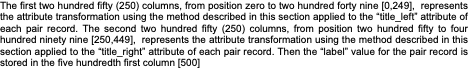

https://tfhub.dev/google/Wiki-words-250-with-normalization/2

**Preprocessed Data Set Outputs:**

* all_gsDataSetW2V_501


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-17 Reading all_gs.jason using pd.read_json from My drive Google Drive

url = "/content/drive/My Drive/Python/Corpus/all_gs.json"

all_gsDataSet = pd.read_json(url,lines=True)

In [ ]:
print ("all_gsDataSet.shape")
print (all_gsDataSet.shape)
print ("all_gsDataSet.dtypes")
print (all_gsDataSet.dtypes)
print ("all_gsDataSet.isnull().sum()")
print (all_gsDataSet.isnull().sum())
all_gsDataSet = all_gsDataSet.reset_index(drop=True)

In [ ]:
all_gsDataSet

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the first argument (string)
# Returns 0 if any of the strings in the function arguments is None
# Version 1.1: 2020-04-10
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/len(x))))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
all_gsDataSet.dtypes

In [ ]:
all_gsDataSet.isnull().sum()

In [ ]:
all_gsDataSet.shape

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

all_gsDataSetW2V = W2V_1(all_gsDataSet,
                     all_gsDataSet.title_left,all_gsDataSet.title_right,
                     all_gsDataSet.label)
print ("all_gsDataSetW2V")
print (all_gsDataSetW2V)


In [ ]:
all_gsDataSetW2V.shape

In [ ]:
all_gsDataSetW2V[0,2]

In [ ]:
all_gsDataSet.label.loc[0]

In [ ]:
all_gsDataSetW2V[0,1]

In [ ]:
#TestDataSet10W2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V', all_gsDataSetW2V)

In [ ]:
#TrainDataSetW2V load numpy array npy in binary format
all_gsDataSetW2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
print (all_gsDataSetW2V.shape)
print (all_gsDataSetW2V.dtype)

In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
all_gsDataSetW2V_501 = w2vMatrix501(all_gsDataSetW2V)
all_gsDataSetW2V_501.shape
all_gsDataSetW2V_501.dtype

In [ ]:
print (all_gsDataSetW2V_501.shape)
print (all_gsDataSetW2V_501.dtype)

In [ ]:
all_gsDataSetW2V[4399,2]

In [ ]:
all_gsDataSetW2V[4399,1][0,249]

In [ ]:
all_gsDataSetW2V_501[4399,500]

In [ ]:
#TrainDataSetW2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V_501', all_gsDataSetW2V_501)

## Preprocessing Data Corpus: Preprocessing of TrainDataSet.pkl to Create 90% Hyperparameter Training Data Set with Word2Vec v2
2020-11-07 JXHALLO: Preprocessing of TrainDataSet90.pkl with Word2Vec
v2: Applied transformation to create matrix (n,501) for word2vec transformation where:

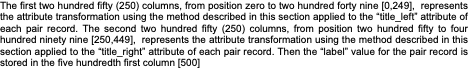

https://tfhub.dev/google/Wiki-words-250-with-normalization/2

**Preprocessed Data Set Outputs:**

* TrainDataSet90W2V_501

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-09 Reading TestDataSet10 using pickle from My drive Google Drive
ValidationDataSet10=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10.pkl')

In [ ]:
ValidationDataSet10

In [ ]:
#2020-08-07 Reading TrainDataSet using pickle from My drive Google Drive
TrainDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')

In [ ]:
print ("TrainDataSet.shape")
print (TrainDataSet.shape)
print ("TrainDataSet.dtypes")
print (TrainDataSet.dtypes)
print ("TrainDataSet.isnull().sum()")
print (TrainDataSet.isnull().sum())
TrainDataSet = TrainDataSet.reset_index(drop=True)

In [ ]:
print ("ValidationDataSet10.shape")
print (ValidationDataSet10.shape)
print ("ValidationDataSet10.dtypes")
print (ValidationDataSet10.dtypes)
print ("ValidationDataSet10.isnull().sum()")
print (ValidationDataSet10.isnull().sum())
ValidationDataSet10 = ValidationDataSet10.reset_index(drop=True)

In [ ]:
#2020-11-07 JXHALLO: Removing from TrainDataSet the ValidationDataSet10 records.
#TrainDataSet90 = pd.merge (TrainDataSet, ValidationDataSet10, how='outer', indicator=True)
cond = TrainDataSet['pair_id'].isin(ValidationDataSet10['pair_id'])
TrainDataSet.drop(TrainDataSet[cond].index, inplace = True)
TrainDataSet90 = TrainDataSet

In [ ]:
print ("TrainDataSet90.shape")
print (TrainDataSet90.shape)
print ("TrainDataSet90.dtypes")
print (TrainDataSet90.dtypes)
print ("TrainDataSet90.isnull().sum()")
print (TrainDataSet90.isnull().sum())
TrainDataSet90 = TrainDataSet90.reset_index(drop=True)

In [ ]:
#2020-11-07 Saving TrainDataSet90 using pickle from My drive Google Drive
TrainDataSet90.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90.pkl')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
TrainDataSet90.dtypes

In [ ]:
TrainDataSet90.isnull().sum()

In [ ]:
TrainDataSet90.shape

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

TrainDataSet90W2V = W2V_1(TrainDataSet90,
                     TrainDataSet90.title_left,TrainDataSet90.title_right,
                     TrainDataSet90.label)
print ("TrainDataSet90")
print (TrainDataSet90)


In [ ]:
TrainDataSet90W2V.shape

In [ ]:
TrainDataSet90W2V[0,2]

In [ ]:
TrainDataSet90W2V.label.loc[0]

In [ ]:
TrainDataSet90W2V[0,1]

In [ ]:
#TestDataSet10W2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V', TrainDataSet90W2V)

In [ ]:
#TestDataSet10W2V load numpy array npy in binary format
TrainDataSet90W2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
a = TrainDataSet90W2V[0]
-5.41110002e-02

In [ ]:
row_count = len(TrainDataSet90W2V[:])
col_count = len(TrainDataSet90W2V[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

row_count = len(a[:])
col_count = len(a[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

In [ ]:
a = a.reshape(1,3)
row_count = len(a[:])
col_count = len(a[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

In [ ]:
a[0,0][0,0]

In [ ]:
b [0,4]

In [ ]:
a.shape

In [ ]:
b = np.array(np.zeros(1*501).reshape(1,501))
b[0,0] = TrainDataSet90W2V[0][0][0][0]
b[0,0]

In [ ]:
b = np.array(np.zeros(1*501).reshape(1,501))
b.shape

In [ ]:
rows = len(TrainDataSet90W2V[:])
columns = len(TrainDataSet90W2V[:][0])
b = np.array(np.zeros(rows*501).reshape(rows,501))
b.shape
print ("rows=%s" %(rows))
print ("columns=%s" %(columns))
for i in range(rows):
  print("i=%s" %(i))
  for j in range(columns):
    print("j=%s" %(j))
    if j == 2:
      b[i,j] = ValidationDataSet10W2V[i,j]
      print ("b[i,j]=%s" %(b[i,j]))
      print ("ValidationDataSet10W2V[i,j]=%s" %(ValidationDataSet10W2V[i,j]))
    else:
      for k in range(250):
        print("k=%s" %(k))
        b[i,k] = ValidationDataSet10W2V[i,j][0,k]
        print ("b[i,k]=%s" %(b[0,k]))
        print ("ValidationDataSet10W2V[i,j][0,k]=%s" %(ValidationDataSet10W2V[i,j][0,k]))
print(b)
 


In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
TrainDataSet90W2V_501 = w2vMatrix501(TrainDataSet90W2V)
TrainDataSet90W2V_501.shape
TrainDataSet90W2V_501.dtype

In [ ]:
print (TrainDataSet90W2V_501.shape)
print (TrainDataSet90W2V_501.dtype)

In [ ]:
TrainDataSet90W2V[3544,2]

In [ ]:
TrainDataSet90W2V[3544,1][0,249]

In [ ]:
TrainDataSet90W2V_501[3544,500]

In [ ]:
#TestDataSet10W2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501', TrainDataSet90W2V_501)

##Preprocessing of ValidationDataSet10.pkl with Word2Vec v2 to Create 10% Hyperparameter Validation Data Set with Word2Vec v2

2020-10-23 JXHALLO: Applied transformation to create matrix (n,501) for word2vec transformation where:

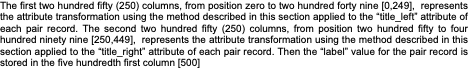

https://tfhub.dev/google/Wiki-words-250-with-normalization/2

**Preprocessed Data Set Outputs:**

* ValidationDataSet10W2V_501

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-09 Reading TestDataSet10 using pickle from My drive Google Drive
ValidationDataSet10=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10.pkl')

In [ ]:
ValidationDataSet10

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
ValidationDataSet10.dtypes

In [ ]:
ValidationDataSet10.isnull().sum()

In [ ]:
ValidationDataSet10.shape

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

ValidationDataSet10W2V = W2V_1(ValidationDataSet10,
                     ValidationDataSet10.title_left,ValidationDataSet10.title_right,
                     ValidationDataSet10.label)
print ("ValidationDataSet10")
print (ValidationDataSet10)


In [ ]:
ValidationDataSet10W2V.shape

In [ ]:
ValidationDataSet10W2V[0,2]

In [ ]:
ValidationDataSet10.label.loc[0]

In [ ]:
ValidationDataSet10W2V[0,1]

In [ ]:
#TestDataSet10W2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V', ValidationDataSet10W2V)

In [ ]:
#TestDataSet10W2V load numpy array npy in binary format
ValidationDataSet10W2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
a = ValidationDataSet10W2V[0]
-5.41110002e-02

In [ ]:
row_count = len(ValidationDataSet10W2V[:])
col_count = len(ValidationDataSet10W2V[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

row_count = len(a[:])
col_count = len(a[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

In [ ]:
a = a.reshape(1,3)
row_count = len(a[:])
col_count = len(a[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

In [ ]:
a[0,0][0,0]

In [ ]:
b [0,4]

In [ ]:
a.shape

(1, 3)

In [ ]:
b = np.array(np.zeros(1*501).reshape(1,501))
b[0,0] = ValidationDataSet10W2V[0][0][0][0]
b[0,0]

In [ ]:
b = np.array(np.zeros(1*501).reshape(1,501))
b.shape

In [ ]:
rows = len(ValidationDataSet10W2V[:])
columns = len(ValidationDataSet10W2V[:][0])
b = np.array(np.zeros(rows*501).reshape(rows,501))
b.shape
print ("rows=%s" %(rows))
print ("columns=%s" %(columns))
for i in range(rows):
  print("i=%s" %(i))
  for j in range(columns):
    print("j=%s" %(j))
    if j == 2:
      b[i,j] = ValidationDataSet10W2V[i,j]
      print ("b[i,j]=%s" %(b[i,j]))
      print ("ValidationDataSet10W2V[i,j]=%s" %(ValidationDataSet10W2V[i,j]))
    else:
      for k in range(250):
        print("k=%s" %(k))
        b[i,k] = ValidationDataSet10W2V[i,j][0,k]
        print ("b[i,k]=%s" %(b[0,k]))
        print ("ValidationDataSet10W2V[i,j][0,k]=%s" %(ValidationDataSet10W2V[i,j][0,k]))
print(b)
 


In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
ValidationDataSet10W2V_501 = w2vMatrix501(ValidationDataSet10W2V)
ValidationDataSet10W2V_501.shape
ValidationDataSet10W2V_501.dtype

In [ ]:
print (ValidationDataSet10W2V_501.shape)
print (ValidationDataSet10W2V_501.dtype)

In [ ]:
ValidationDataSet10W2V[3544,2]

In [ ]:
ValidationDataSet10W2V[3544,1][0,249]

In [ ]:
ValidationDataSet10W2V_501[3544,500]

In [ ]:
#TestDataSet10W2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501', ValidationDataSet10W2V_501)

# ***Preprocessing Data Corpus***

DL Similarity Matrix Data Processing

##Preprocessing of TrainDataSet.pkl with DL Similarity Matrix
2020-10-23 JXHALLO: Re Preprocesing DL TrainingDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]

**Preprocessed Data Set Outputs:**

* TrainDataSetDL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x = 'JULIO'
y = 'HALLOLARREA'
lenx = len(x)
print (lenx)
leny = len(y)
print (len(y))
z = max ((len(x)),(len(y)))
print (z)

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

TestDataSet=pd.read_pickle(io.BytesIO(uploaded['TestDataSet.pkl']))

In [ ]:
TestDataSet=pd.DataFrame(None)
print ("TestDataSet.shape")
print (TestDataSet.shape)

In [ ]:
#2020-08-07 Reading TrainDataSet using pickle from My drive Google Drive
TrainDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')

In [ ]:
print ("TrainDataSet.shape")
print (TrainDataSet.shape)
print ("TrainDataSet.dtypes")
print (TrainDataSet.dtypes)
print ("TrainDataSet.isnull().sum()")
print (TrainDataSet.isnull().sum())
TrainDataSet = TrainDataSet.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(TrainDataSet)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

TrainDataSetDL = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("TrainDataSetDL")
print (TrainDataSetDL)

In [ ]:
TrainDataSetDL[35563]

In [ ]:
print (data2.labelList[35563])
print (data2.categoryListLeft[35563])
print (data2.categoryListRight[35563])
print (DL(data2.categoryListLeft[35563],data2.categoryListRight[35563]))

In [ ]:
print (data2.shape)

In [ ]:

print (data2.dtypes)


In [ ]:

print (data2.isnull().sum())

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]

np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetDL', TrainDataSetDL)


##Preprocessing of TestDataSet10.pkl with DL Similarity Matrix
2020-10-23 JXHALLO: Re Preprocesing DL TestDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]

**Preprocessed Data Set Outputs:**

* TestDataSetDL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

TestDataSet=pd.read_pickle(io.BytesIO(uploaded['TestDataSet.pkl']))

In [ ]:
TestDataSet=pd.DataFrame(None)
print ("TestDataSet.shape")
print (TestDataSet.shape)

In [ ]:
#2020-08-07 Reading AppendedDataFile using pickle from My drive Google Drive
TestDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSet.pkl')

In [ ]:
print ("TestDataSet.shape")
print (TestDataSet.shape)
print ("TestDataSet.dtypes")
print (TestDataSet.dtypes)
print ("TestDataSet.isnull().sum()")
print (TestDataSet.isnull().sum())
TestDataSet = TestDataSet.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(TestDataSet)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

TestDataSetDL2 = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("TestDataSetDL2")
print (TestDataSetDL2)

In [ ]:
TestDataSetDL = TestDataSetDL2

In [ ]:
print ("TestDataSetDL")
print (TestDataSetDL)

In [ ]:
TestDataSetDL[0]

In [ ]:
print (data2.labelList[0])
print (data2.categoryListLeft[0])
print (data2.categoryListRight[0])
print (DL(data2.categoryListLeft[0],data2.categoryListRight[0]))

In [ ]:
print (data2.labelList[0])
print (data2.descriptionListLeft[0])
print (data2.descriptionListRight[0])
print (DL(data2.descriptionListLeft[0],data2.descriptionListRight[0]))


In [ ]:
print (len(data2.descriptionListLeft[0]))
print (len(data2.descriptionListRight[0]))
print (damerau_levenshtein (data2.descriptionListLeft[0],data2.descriptionListRight[0]))
print ((damerau_levenshtein (data2.descriptionListLeft[0],data2.descriptionListRight[0]))/(len(data2.descriptionListRight[0])))

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]
#TestDataSet10DL = asarray (TestDataSet10DL)
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetDL', TestDataSetDL)


##Preprocessing of all_gsDataSet with DL Similarity Matrix
2020-10-23 JXHALLO: Re Preprocesing DL all_gsDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]

**Preprocessed Data Set Outputs:**

* all_gsDataSetDL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

TestDataSet=pd.read_pickle(io.BytesIO(uploaded['TestDataSet.pkl']))

In [ ]:
TestDataSet=pd.DataFrame(None)
print ("TestDataSet.shape")
print (TestDataSet.shape)

In [ ]:
#2020-08-17 Reading all_gs using pickle from My drive Google Drive
#all_gsDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')

url = "/content/drive/My Drive/Python/Corpus/all_gs.json"

all_gsDataSet = pd.read_json(url,lines=True)

In [ ]:
print ("all_gsDataSet.shape")
print (all_gsDataSet.shape)
print ("all_gsDataSet.dtypes")
print (all_gsDataSet.dtypes)
print ("all_gsDataSet.isnull().sum()")
print (all_gsDataSet.isnull().sum())
all_gsDataSet = all_gsDataSet.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(all_gsDataSet)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

all_gsDataSetDL = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("all_gsDataSetDL")
print (all_gsDataSetDL)

In [ ]:
all_gsDataSetDL[4399]

In [ ]:
print (data2.labelList[0])
print (data2.categoryListLeft[0])
print (data2.categoryListRight[0])
print (DL(data2.categoryListLeft[0],data2.categoryListRight[0]))

In [ ]:
print (data2.shape)

In [ ]:

print (data2.dtypes)


In [ ]:

print (data2.isnull().sum())

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]

np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetDL', all_gsDataSetDL)


In [ ]:
all_gsDataSetDL[0]


In [ ]:
all_gsDataSetDL.shape

## Preprocessing Data Corpus: Preprocessing of TrainDataSet.pkl to Create 90% Hyperparameter Training Data Set with DL Similarity Matrix
2020-11-07 JXHALLO: Re Preprocesing DL TrainingDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]
Removing from train data set the validation data set records (10%) to have a clean 90%


**Preprocessed Data Set Outputs:**

* TrainDataSet90DL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

TestDataSet=pd.read_pickle(io.BytesIO(uploaded['TestDataSet.pkl']))

In [ ]:
TestDataSet=pd.DataFrame(None)
print ("TestDataSet.shape")
print (TestDataSet.shape)

In [ ]:
#2020-08-07 Reading TrainDataSet using pickle from My drive Google Drive
TrainDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')

In [ ]:
#2020-08-07 Reading AppendedDataFile using pickle from My drive Google Drive
TrainDataSet90=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90.pkl')

In [ ]:
#2020-11-07 Reading TrainDataSet90 using pickle from My drive Google Drive
ValidationDataSet10=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10.pkl')

In [ ]:
print ("TrainDataSet.shape")
print (TrainDataSet.shape)
print ("TrainDataSet.dtypes")
print (TrainDataSet.dtypes)
print ("TrainDataSet.isnull().sum()")
print (TrainDataSet.isnull().sum())
TrainDataSet = TrainDataSet.reset_index(drop=True)

In [ ]:
print ("ValidationDataSet10.shape")
print (ValidationDataSet10.shape)
print ("ValidationDataSet10.dtypes")
print (ValidationDataSet10.dtypes)
print ("ValidationDataSet10.isnull().sum()")
print (ValidationDataSet10.isnull().sum())
ValidationDataSet10 = ValidationDataSet10.reset_index(drop=True)

In [ ]:
#2020-11-07 JXHALLO: Removing from TrainDataSet the ValidationDataSet10 records.
#TrainDataSet90 = pd.merge (TrainDataSet, ValidationDataSet10, how='outer', indicator=True)
cond = TrainDataSet['pair_id'].isin(ValidationDataSet10['pair_id'])
TrainDataSet.drop(TrainDataSet[cond].index, inplace = True)
TrainDataSet90 = TrainDataSet

In [ ]:
print ("TrainDataSet90.shape")
print (TrainDataSet90.shape)
print ("TrainDataSet90.dtypes")
print (TrainDataSet90.dtypes)
print ("TrainDataSet90.isnull().sum()")
print (TrainDataSet90.isnull().sum())
TrainDataSet90 = TrainDataSet90.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(TrainDataSet90)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

TrainDataSet90DL = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("TrainDataSet90DL")
print (TrainDataSet90DL)

In [ ]:
TrainDataSet90DL[35563]

In [ ]:
print (data2.labelList[35563])
print (data2.categoryListLeft[35563])
print (data2.categoryListRight[35563])
print (DL(data2.categoryListLeft[35563],data2.categoryListRight[35563]))

In [ ]:
print (data2.shape)

In [ ]:

print (data2.dtypes)


In [ ]:

print (data2.isnull().sum())

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]

np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90DL', TrainDataSet90DL)


In [ ]:
TrainDataSet90DL[0]


In [ ]:
TrainDataSet90DL.shape

## Preprocessing Data Corpus: Preprocessing of TrainDataSet.pkl to Create 10% Hyperparameter Validation Data Set with DL Similarity Matrix
2020-11-07 JXHALLO: Re Preprocesing DL TrainingDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]
Removing from train data set the train data set records (90%) to have a clean 10%


**Preprocessed Data Set Outputs:**

* ValidationDataSet10DL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

ValidationDataSet10=pd.read_pickle(io.BytesIO(uploaded['ValidationDataSet10.pkl']))

In [ ]:
ValidationDataSet10=pd.DataFrame(None)
print ("ValidationDataSet10.shape")
print (ValidationDataSet10.shape)

In [ ]:
#2020-08-07 Reading AppendedDataFile using pickle from My drive Google Drive
ValidationDataSet10=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10.pkl')

In [ ]:
print ("ValidationDataSet10.shape")
print (ValidationDataSet10.shape)
print ("ValidationDataSet10.dtypes")
print (ValidationDataSet10.dtypes)
print ("ValidationDataSet10.isnull().sum()")
print (ValidationDataSet10.isnull().sum())
ValidationDataSet10 = ValidationDataSet10.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(ValidationDataSet10)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

ValidationDataSet10DL2 = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("ValidationDataSet10DL2")
print (ValidationDataSet10DL2)

In [ ]:
ValidationDataSet10DL = ValidationDataSet10DL2

In [ ]:
print ("ValidationDataSet10DL")
print (ValidationDataSet10DL)

In [ ]:
ValidationDataSet10DL[0]

In [ ]:
print (data2.labelList[0])
print (data2.categoryListLeft[0])
print (data2.categoryListRight[0])
print (DL(data2.categoryListLeft[0],data2.categoryListRight[0]))

In [ ]:
print (data2.labelList[0])
print (data2.descriptionListLeft[0])
print (data2.descriptionListRight[0])
print (DL(data2.descriptionListLeft[0],data2.descriptionListRight[0]))


In [ ]:
print (len(data2.descriptionListLeft[0]))
print (len(data2.descriptionListRight[0]))
print (damerau_levenshtein (data2.descriptionListLeft[0],data2.descriptionListRight[0]))
print ((damerau_levenshtein (data2.descriptionListLeft[0],data2.descriptionListRight[0]))/(len(data2.descriptionListRight[0])))

In [ ]:
print (data2.loc[3544])

In [ ]:

print (data2.dtypes)


In [ ]:

print (data2.isnull().sum())

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-08-07 JUHO: Saving TestDataSetDL preprocessed data using DL Similarity
ValidationDataSet10DL.to_pickle('content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10DL.pkl')

In [ ]:

# save numpy array as npy file
#from numpy import asarray
#from numpy import save

# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
#save('content/drive/My Drive/Python/20200720_DataAnalysis/data.npy', data)
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/data', data, allow_pickle=True, fix_imports=True)


In [ ]:
data[0,:]

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]
#TestDataSet10DL = asarray (TestDataSet10DL)
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10DL', ValidationDataSet10DL)


In [ ]:
ValidationDataSet10DL[0,10].dtype

In [ ]:
ValidationDataSet10DL.shape

# ***Hyperparameter Estimation***


## ***Hyperparameter Estimation MLP DL Similarity Matrix***

MLP - DL Similarity Matrix Preprocessing

2020-11-08
JUHO: MLP Architecture
Data Sets:
Train: TrainDataSet90DL
Validation: ValidationDataSetDL
Preprocessing Method: DL Data Set Matrixes
Using TALOS Library

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
# For the current version: 
!pip install --upgrade tensorflow
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10DL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10DL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90DL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90DL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10DL[0,10].dtype

In [ ]:
TrainDataSet90DL[0,10].dtype

In [ ]:
ValidationDataSet10DL.shape

In [ ]:
TrainDataSet90DL.shape

In [ ]:
ValidationDataSet10DL_data,ValidationDataSet10DL_label=np.split(ValidationDataSet10DL,[10],axis=1)


In [ ]:
TrainDataSet90DL_data,TrainDataSet90DL_label=np.split(TrainDataSet90DL,[10],axis=1)


In [ ]:
print (ValidationDataSet10DL_data.shape)
print (ValidationDataSet10DL_label.shape)

In [ ]:
np.count_nonzero(ValidationDataSet10DL_label == 0)

In [ ]:
print (TrainDataSet90DL_data.shape)
print (TrainDataSet90DL_label.shape)

In [ ]:
ValidationDataSet10DL_data[0,2]
print (ValidationDataSet10DL_data.max())
print (ValidationDataSet10DL_data.argmax())

max_index_col = np.argmax(ValidationDataSet10DL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(ValidationDataSet10DL_data, axis=1)

print(max_index_row)

In [ ]:
TrainDataSet90DL_data[0,2]
print (TrainDataSet90DL_data.max())
print (TrainDataSet90DL_data.argmax())

max_index_col = np.argmax(TrainDataSet90DL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(TrainDataSet90DL_data, axis=1)

print(max_index_row)

In [ ]:
ValidationDataSet10DL_label

In [ ]:
TrainDataSet90DL_label

In [ ]:
print (ValidationDataSet10DL_data.dtype)
print (ValidationDataSet10DL_label.dtype)

In [ ]:
print (TrainDataSet90DL_data.dtype)
print (TrainDataSet90DL_label.dtype)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
# Defining the Model

def multi_layer_percetron_FFNN_DL_pOpt(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    # model.add(Input(shape=10))
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer='normal'))
        # if we want to also test for number of layers and shapes, that's possible

    model.add(Dropout(params['dropout']))
        # if we want to also test for number of layers and shapes, that's possible
    
    
    hidden_layers(model, params, 1)

   
    # then we finish again with completely standard Keras way
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer='normal'))
    
    model.compile(loss=params['losses'],
                  # here we add a regulizer normalization function from Talos
                  optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                  )
    plot_model(model,show_shapes=True, show_layer_names=True)
    model.summary()             
    
    history = model.fit(x_train,
                        y_train, 
                        validation_data=(x_val, y_val),
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        #callbacks=[ExperimentLogCallback('multi_layer_percetron_FFNN', params)]
                        )
    
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [ ]:
# then we can go ahead and set the parameter space
p = {'lr': (0.5, 5, 2),
     'first_neuron':[500,600,700,800],
     'hidden_layers':[1,2,3,4],
     'batch_size': [1000],
     'epochs': [100,200,1000],
     'dropout': (0, 0.5, 3),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['brick'],
     'optimizer': [Adam,Nadam,RMSprop],
     'losses': ['binary_crossentropy'],
     'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']}

In [ ]:
# Parameters P. Estimating Architecture Parameters as First Neuron and Hidden Layers
pArch = {'lr': [0.5],
     'first_neuron':[10],
     'hidden_layers':[1,2,3,4,5,6,7,8,9,10],
     'batch_size': [1000],
     'epochs': [10,100,1000],
     'dropout': [0.5],
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['funnel','brick','triangle'],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'activation':['elu'],
     'last_activation': ['sigmoid']}

In [ ]:
# Parameters P. Estimating Architecture Parameters as First Neuron and Hidden Layers
pOpt = {'lr': (0.5, 5, 2),
     'first_neuron':[10],
     'hidden_layers':[4],
     'batch_size': [1000],
     'epochs': [100],
     'dropout': (0, 0.5, 3),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['brick'],
     'optimizer': [SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam],
    #  'optimizer': [Adadelta],
     'losses': ['binary_crossentropy', 'logcosh'],
    #  'activation':['relu','tanh', 'selu', 'elu', 'exponential'],
     'activation':['relu','tanh', 'selu', 'elu', 'sigmoid', 'softmax', 'softplus', 'softsign'],
     'last_activation': ['sigmoid']}

In [ ]:
print (ValidationDataSet10DL_data.shape)
print (ValidationDataSet10DL_label.shape)

In [ ]:
print (TrainDataSet90DL_data.shape)
print (TrainDataSet90DL_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90DL_data
y = TrainDataSet90DL_label

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10DL_data
y_val = ValidationDataSet10DL_label

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=multi_layer_percetron_FFNN_DL_pOpt,
            params=pOpt,
            experiment_name='multi_layer_percetron_FFNN_DL_pOpt',
            fraction_limit=0.5,
            # time_limit = "2020-11-22 16:00",
            round_limit=400,
            print_params=True,
            reduction_metric='val_f1score',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_f1score',0.65,False]        
            )

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/MyDrive/Python/20200720_DataAnalysis/20201109_multi_layer_percetron_FFNN_DL_pOpt.pkl')

In [ ]:
analyze_object=pd.read_pickle('/content/drive/My Drive/Python/20201122_DataAnalysis/20201109_multi_layer_percetron_FFNN_DL_pOpt.pkl')

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20201109_multi_layer_percetron_FFNN_DL_pOpt.xlsx', sheet_name='20201122_MLP_FFNN_DL_pOpt', index = False)

In [ ]:
# access the dataframe with the results
analyze_object.data

## ***Hyperparameter Estimation MLP - W2V_501***
MLP - W2V_501 Preprocessing

2021-01-09 JUHO: MLP Architecture
Data Sets:
Train: TrainDataSet90W2V_501
Validation: ValidationDataSet10W2V_501
Preprocessing Method: W2V_501 Data Set Matrixes
Using TALOS Library
Optimization Hyperparameters Estimation


### **Architecture Estimation**

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
# For the current version: 
!pip install --upgrade tensorflow
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10W2V_501[0,10].dtype

In [ ]:
TrainDataSet90W2V_501[0,10].dtype

In [ ]:
ValidationDataSet10W2V_501.shape

In [ ]:
TrainDataSet90W2V_501.shape

In [ ]:
ValidationDataSet10W2V_501_data,ValidationDataSet10W2V_501_label=np.split(ValidationDataSet10W2V_501,[500],axis=1)


In [ ]:
TrainDataSet90W2V_501_data,TrainDataSet90W2V_501_label=np.split(TrainDataSet90W2V_501,[500],axis=1)


In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
np.count_nonzero(ValidationDataSet10W2V_501_label == 0)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

In [ ]:
ValidationDataSet10W2V_501_data[0,2]
print (ValidationDataSet10W2V_501_data.max())
print (ValidationDataSet10W2V_501_data.argmax())

max_index_col = np.argmax(ValidationDataSet10W2V_501_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(ValidationDataSet10W2V_501_data, axis=1)

print(max_index_row)

In [ ]:
TrainDataSet90W2V_501_data[0,2]
print (TrainDataSet90W2V_501_data.max())
print (TrainDataSet90W2V_501_data.argmax())

max_index_col = np.argmax(TrainDataSet90W2V_501_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(TrainDataSet90W2V_501_data, axis=1)

print(max_index_row)

In [ ]:
ValidationDataSet10W2V_501_label

In [ ]:
TrainDataSet90W2V_501_label

In [ ]:
print (ValidationDataSet10W2V_501_data.dtype)
print (ValidationDataSet10W2V_501_label.dtype)

In [ ]:
print (TrainDataSet90W2V_501.dtype)
print (TrainDataSet90W2V_501.dtype)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
# Defining the Model

def multi_layer_percetron_FFNN_W2V_501_pArch6(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    # model.add(Input(shape=10))
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer='normal'))
        # if we want to also test for number of layers and shapes, that's possible

    model.add(Dropout(params['dropout']))
        # if we want to also test for number of layers and shapes, that's possible
    
    
    hidden_layers(model, params, 1)

   
    # then we finish again with completely standard Keras way
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer='normal'))
    
    model.compile(loss=params['losses'],
                  # here we add a regulizer normalization function from Talos
                  optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                  )
    plot_model(model,show_shapes=True, show_layer_names=True)
    model.summary()             
    
    history = model.fit(x_train,
                        y_train, 
                        validation_data=(x_val, y_val),
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        #callbacks=[ExperimentLogCallback('multi_layer_percetron_FFNN', params)]
                        )
    
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [ ]:
# then we can go ahead and set the parameter space
p = {'lr': (0.5, 5, 2),
     'first_neuron':[500,600,700,800],
     'hidden_layers':[1,2,3,4],
     'batch_size': [1000],
     'epochs': [100,200,1000],
     'dropout': (0, 0.5, 3),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['brick'],
     'optimizer': [Adam,Nadam,RMSprop],
     'losses': ['binary_crossentropy'],
     'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']}

In [ ]:
# Parameters P. Estimating Architecture Parameters as First Neuron and Hidden Layers
pArch = {'lr': [0.5],
     'first_neuron':[500],
     'hidden_layers':[1,2,3,4,5],
     'batch_size': [1000],
     'epochs': [10,100],
     'dropout': [0.5],
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['funnel','brick','triangle'],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'activation':['elu'],
     'last_activation': ['sigmoid']}

In [ ]:
# Parameters P. Estimating Architecture Parameters as First Neuron and Hidden Layers
pArch2 = {'lr': [0.5],
     'first_neuron':[500],
     'hidden_layers':[2,3,4,5],
     'batch_size': [1000],
     'epochs': [1000],
     'dropout': [0.5],
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['brick'],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'activation':['elu'],
     'last_activation': ['sigmoid']}

In [ ]:
# Parameters P. Estimating Architecture Parameters as First Neuron and Hidden Layers
pArch6 = {'lr': [0.5],
     'first_neuron':[500],
     'hidden_layers':[1,2,3,4,5],
     'batch_size': [1000],
     'epochs': [1000],
     'dropout': [0.5],
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['brick'],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'activation':['elu'],
     'last_activation': ['sigmoid']}

In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90W2V_501_data
y = TrainDataSet90W2V_501_label

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10W2V_501_data
y_val = ValidationDataSet10W2V_501_label

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=multi_layer_percetron_FFNN_W2V_501_pArch6,
            params=pArch6,
            experiment_name='multi_layer_percetron_FFNN_W2V_501_pArch6',
            # fraction_limit=0.001,
            # round_limit=1,
            print_params=True,
            reduction_metric='val_custom_f1',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_custom_f1',0.65,False]        
            )

In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/20201217_multi_layer_percetron_FFNN_W2V_501_pArch6.pkl')

In [ ]:
# access the dataframe with the results
analyze_object.data

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20201217_multi_layer_percetron_FFNN_W2V_501_pArch6.xlsx', sheet_name='20201217_mlp_W2V_501_pArch6', index = False)

### ***Optimization Estimation***

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10W2V_501[0,10].dtype

In [ ]:
TrainDataSet90W2V_501[0,10].dtype

In [ ]:
ValidationDataSet10W2V_501.shape

In [ ]:
TrainDataSet90W2V_501.shape

In [ ]:
ValidationDataSet10W2V_501_data,ValidationDataSet10W2V_501_label=np.split(ValidationDataSet10W2V_501,[500],axis=1)


In [ ]:
TrainDataSet90W2V_501_data,TrainDataSet90W2V_501_label=np.split(TrainDataSet90W2V_501,[500],axis=1)


In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
np.count_nonzero(ValidationDataSet10W2V_501_label == 0)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

In [ ]:
ValidationDataSet10W2V_501_data[0,2]
print (ValidationDataSet10W2V_501_data.max())
print (ValidationDataSet10W2V_501_data.argmax())

max_index_col = np.argmax(ValidationDataSet10W2V_501_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(ValidationDataSet10W2V_501_data, axis=1)

print(max_index_row)

In [ ]:
TrainDataSet90W2V_501_data[0,2]
print (TrainDataSet90W2V_501_data.max())
print (TrainDataSet90W2V_501_data.argmax())

max_index_col = np.argmax(TrainDataSet90W2V_501_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(TrainDataSet90W2V_501_data, axis=1)

print(max_index_row)

In [ ]:
ValidationDataSet10W2V_501_label

In [ ]:
TrainDataSet90W2V_501_label

In [ ]:
print (ValidationDataSet10W2V_501_data.dtype)
print (ValidationDataSet10W2V_501_label.dtype)

In [ ]:
print (TrainDataSet90W2V_501.dtype)
print (TrainDataSet90W2V_501.dtype)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
# Defining the Model

def multi_layer_percetron_FFNN_W2V_501_pOpt1(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    # model.add(Input(shape=10))
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer='normal'))
        # if we want to also test for number of layers and shapes, that's possible

    model.add(Dropout(params['dropout']))
        # if we want to also test for number of layers and shapes, that's possible
    
    
    hidden_layers(model, params, 1)

   
    # then we finish again with completely standard Keras way
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer='normal'))
    
    model.compile(loss=params['losses'],
                  # here we add a regulizer normalization function from Talos
                  optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                  )
    plot_model(model,show_shapes=True, show_layer_names=True)
    model.summary()             
    
    history = model.fit(x_train,
                        y_train, 
                        validation_data=(x_val, y_val),
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        #callbacks=[ExperimentLogCallback('multi_layer_percetron_FFNN', params)]
                        )
    
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [ ]:
# Parameters P. Estimating Optimization Parameters as Learning Rate, dropout, optimizer, losses, activation
pOpt1 = {'lr': [0.5,2.75],
     'first_neuron':[500],
     'hidden_layers':[10],
     'batch_size': [1000],
     'epochs': [1000],
     'dropout': [0,0.1666,0.3333],
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['brick'],
     'optimizer': [SGD,RMSprop,Adam,Adadelta,Adagrad,Adamax,Nadam],
     'losses': ['binary_crossentropy','logcosh'],
     'activation':['relu','softmax','softplus','softsing','tanh','selu','elu'],
     'last_activation': ['sigmoid']}

In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90W2V_501_data
y = TrainDataSet90W2V_501_label

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10W2V_501_data
y_val = ValidationDataSet10W2V_501_label

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=multi_layer_percetron_FFNN_W2V_501_pOpt1,
            params=pOpt1,
            experiment_name='multi_layer_percetron_FFNN_W2V_501_pOpt1',
            # fraction_limit=0.001,
            # round_limit=1,
            time_limit = "2021-01-11 20:30",
            print_params=True,
            reduction_metric='val_custom_f1',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_custom_f1',0.65,False]        
            )

In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/20210109_multi_layer_percetron_FFNN_W2V_501_pOpt1.pkl')

In [ ]:
# access the dataframe with the results
analyze_object.data

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20210109_multi_layer_percetron_FFNN_W2V_501_pOpt1.xlsx', sheet_name='20210109_mlp_W2V_501_pOpt1', index = False)

## ***Hyperparameter Estimation LSTM - DL Similarity Matrix***
LSTM - DL Similarity Matrix Preprocessing

2020-12-13
JUHO: LSTM Architecture
Data Sets:
Train: TrainDataSet90DL
Validation: ValidationDataSet10DL
Preprocessing Method: DL Data Set Matrixes
Using TALOS Library

### **Architecture Estimation**

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10DL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10DL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90DL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90DL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10DL[0,10].dtype

In [ ]:
TrainDataSet90DL[0,10].dtype

In [ ]:
ValidationDataSet10DL.shape

In [ ]:
TrainDataSet90DL.shape

In [ ]:
ValidationDataSet10DL_data,ValidationDataSet10DL_label=np.split(ValidationDataSet10DL,[10],axis=1)


In [ ]:
TrainDataSet90DL_data,TrainDataSet90DL_label=np.split(TrainDataSet90DL,[10],axis=1)


In [ ]:
print (ValidationDataSet10DL_data.shape)
print (ValidationDataSet10DL_label.shape)

In [ ]:
np.count_nonzero(ValidationDataSet10DL_label == 0)

In [ ]:
print (TrainDataSet90DL_data.shape)
print (TrainDataSet90DL_label.shape)

In [ ]:
y = np.expand_dims(TrainDataSet90DL_data, axis=1)

In [ ]:
print (y.shape)

In [ ]:
print (y[74231])

In [ ]:
ValidationDataSet10DL_data[0,2]
print (ValidationDataSet10DL_data.max())
print (ValidationDataSet10DL_data.argmax())

max_index_col = np.argmax(ValidationDataSet10DL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(ValidationDataSet10DL_data, axis=1)

print(max_index_row)

In [ ]:
TrainDataSet90DL_data[0,2]
print (TrainDataSet90DL_data.max())
print (TrainDataSet90DL_data.argmax())

max_index_col = np.argmax(TrainDataSet90DL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(TrainDataSet90DL_data, axis=1)

print(max_index_row)

In [ ]:
ValidationDataSet10DL_label

In [ ]:
TrainDataSet90DL_label

In [ ]:
print (ValidationDataSet10DL_data.dtype)
print (ValidationDataSet10DL_label.dtype)

In [ ]:
print (TrainDataSet90DL_data.dtype)
print (TrainDataSet90DL_label.dtype)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics
from talos.utils import best_model

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

**2020-12-13 Using Nuew AutoModel Talos function**

In [ ]:
class AutoModelJXHL:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2])                    
                           )
            )
        
        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL2:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL3:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'],                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
autoParams2 = {'activation': ['elu'],
               'batch_size': [32, 64, 128],
               'dropout': [0.5],
               'epochs': [10, 100, 1000],
               'first_neuron': [10],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': ['sigmoid'],
               'losses': ['binary_crossentropy'],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
autoParams2

In [ ]:
autoModel1= ta.autom8.AutoModel(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1').model

In [ ]:
autoModel1JXHL= AutoModelJXHL(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL').model

In [ ]:
autoModel2JXHL= AutoModelJXHL2(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL2').model

In [ ]:
autoModel3JXHL= AutoModelJXHL3(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel3JXHL').model

In [ ]:
print (ValidationDataSet10DL_data.shape)
print (ValidationDataSet10DL_label.shape)

In [ ]:
print (TrainDataSet90DL_data.shape)
print (TrainDataSet90DL_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90DL_data
y = TrainDataSet90DL_label

In [ ]:
x = np.expand_dims(x, axis=1)

In [ ]:
print (x.shape)

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10DL_data
y_val = ValidationDataSet10DL_label

In [ ]:
x_val = np.expand_dims(x_val, axis=1)

In [ ]:
print (x_val.shape)

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=autoModel3JXHL,
            params=autoParams2,
            experiment_name='autoModel3JXHL',
            # fraction_limit=0.5,
            # time_limit = "2020-11-22 16:00",
            # round_limit=2,
            print_params=True,
            reduction_metric='val_f1score',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_f1score',0.65,False]        
            )

In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/MyDrive/Python/20200720_DataAnalysis/20201217_autoModel3JXHL_LSTM_DL_autoParams2.pkl')

In [ ]:
analyze_object=pd.read_pickle('/content/drive/My Drive/Python/20201122_DataAnalysis/20201109_multi_layer_percetron_FFNN_DL_pOpt.pkl')

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20201217_autoModel3JXHL_LSTM_DL_autoParams2.xlsx', sheet_name='20201217_autoModel3JXHL_LSTM_DL', index = False)

In [ ]:
# access the dataframe with the results
analyze_object.data

### **Optmizatin Estimation**

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10DL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10DL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90DL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90DL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10DL[0,10].dtype

In [ ]:
TrainDataSet90DL[0,10].dtype

In [ ]:
ValidationDataSet10DL.shape

In [ ]:
TrainDataSet90DL.shape

In [ ]:
ValidationDataSet10DL_data,ValidationDataSet10DL_label=np.split(ValidationDataSet10DL,[10],axis=1)


In [ ]:
TrainDataSet90DL_data,TrainDataSet90DL_label=np.split(TrainDataSet90DL,[10],axis=1)


In [ ]:
print (ValidationDataSet10DL_data.shape)
print (ValidationDataSet10DL_label.shape)

In [ ]:
np.count_nonzero(ValidationDataSet10DL_label == 0)

In [ ]:
print (TrainDataSet90DL_data.shape)
print (TrainDataSet90DL_label.shape)

In [ ]:
y = np.expand_dims(TrainDataSet90DL_data, axis=1)

In [ ]:
print (y.shape)

In [ ]:
print (y[74231])

In [ ]:
ValidationDataSet10DL_data[0,2]
print (ValidationDataSet10DL_data.max())
print (ValidationDataSet10DL_data.argmax())

max_index_col = np.argmax(ValidationDataSet10DL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(ValidationDataSet10DL_data, axis=1)

print(max_index_row)

In [ ]:
TrainDataSet90DL_data[0,2]
print (TrainDataSet90DL_data.max())
print (TrainDataSet90DL_data.argmax())

max_index_col = np.argmax(TrainDataSet90DL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(TrainDataSet90DL_data, axis=1)

print(max_index_row)

In [ ]:
ValidationDataSet10DL_label

In [ ]:
TrainDataSet90DL_label

In [ ]:
print (ValidationDataSet10DL_data.dtype)
print (ValidationDataSet10DL_label.dtype)

In [ ]:
print (TrainDataSet90DL_data.dtype)
print (TrainDataSet90DL_label.dtype)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics
from talos.utils import best_model

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
class AutoModelJXHL:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2])                    
                           )
            )
        
        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL2:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL3:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'],                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
# class to Tune Optimization Hyperparameters on LSTM 3 Layers + Dropout + Dense Output layer
class AutoModelJXHL4:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True,
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           dropout = params['LSTM_dropout'],
                           recurrent_dropout = params['LSTM_recurrent_dropout']
                           )
            )
            model.add(LSTM(params['first_neuron'],                    
                           return_sequences=True,
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           dropout = params['LSTM_dropout'],
                           recurrent_dropout = params['LSTM_recurrent_dropout']
                           )
            )
            model.add(LSTM(params['first_neuron'],
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           dropout = params['LSTM_dropout'],
                           recurrent_dropout = params['LSTM_recurrent_dropout']
                           )
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
autoParams2 = {'activation': ['elu'],
               'batch_size': [32, 64, 128],
               'dropout': [0.5],
               'epochs': [10, 100, 1000],
               'first_neuron': [10],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': ['sigmoid'],
               'losses': ['binary_crossentropy'],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
autoParams4 = {'activation': ['elu'],
               'batch_size': [32],
               'dropout': [0.3333],
               'epochs': [1000],
               'first_neuron': [10],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': ['sigmoid'],
               'losses': ['binary_crossentropy'],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick'],
               'LSTM_activation': ['tanh'],
               'LSTM_recurrent_activation': ['sigmoid'],
               'LSTM_dropout': [0],
               'LSTM_recurrent_dropout': [0]}

In [ ]:
autoParams4

In [ ]:
autoModel1= ta.autom8.AutoModel(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1').model

In [ ]:
autoModel1JXHL= AutoModelJXHL(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL').model

In [ ]:
autoModel2JXHL= AutoModelJXHL2(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL2').model

In [ ]:
autoModel3JXHL= AutoModelJXHL3(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel3JXHL').model

In [ ]:
autoModel4JXHL= AutoModelJXHL4(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel4JXHL').model

In [ ]:
print (ValidationDataSet10DL_data.shape)
print (ValidationDataSet10DL_label.shape)

In [ ]:
print (TrainDataSet90DL_data.shape)
print (TrainDataSet90DL_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90DL_data
y = TrainDataSet90DL_label

In [ ]:
x = np.expand_dims(x, axis=1)

In [ ]:
print (x.shape)

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10DL_data
y_val = ValidationDataSet10DL_label

In [ ]:
x_val = np.expand_dims(x_val, axis=1)

In [ ]:
print (x_val.shape)

In [ ]:
# Python3 code to demonstrate  
# Getting current date and time using   
# now().  
    
# importing datetime module for now()  
import datetime  
    
# using now() to get current time  
current_time = datetime.datetime.now()  
    
# Printing value of now.  
print ("Time now at greenwich meridian is : "
                                    , end = "")  
print (current_time) 

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=autoModel4JXHL,
            params=autoParams4,
            experiment_name='autoModel4JXHL',
            # fraction_limit=0.5,
            time_limit = "2021-03-09 12:00",
            # round_limit=2,
            print_params=True,
            reduction_metric='val_f1score',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_f1score',0.65,False]        
            )

In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/MyDrive/Python/20200720_DataAnalysis/20210305_autoModel4JXHL_Arch2_LSTM_DL_Final.pkl')

In [ ]:
/content/drive/MyDrive/Python/20200720_DataAnalysis

In [ ]:
analyze_object=pd.read_pickle('/content/drive/My Drive/Python/20201122_DataAnalysis/20201109_multi_layer_percetron_FFNN_DL_pOpt.pkl')

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20210305_autoModel4JXHL_Arch2_LSTM_DL_Final.xlsx', sheet_name='20210305_autoModel4JXHL_Arch', index = False)

In [ ]:
# access the dataframe with the results
analyze_object.data

## ***Hyperparameter Estimation LSTM - W2V_501***

2021-01-25
JUHO: LSTM Architecture
Data Sets:
Train: TrainDataSet90W2V_501
Validation: ValidationDataSet10W2V_501
Preprocessing Method: W2V_501 Data Set Matrixes
Using TALOS Library
Tests using AutoModel, AutoParams, AutoScan
Introducing New LSTM Hyperparameters Estimation:
LSTM_activation = tanh
LSTM_recurrent_activation = sigmoid
LSTM_recurrent_dropout = 0
LSTM_dropout = 0.3333, 0.5, 0.8333
Using New Data Transformation Array for Data (3D) with:
Samples: Number of Data Records
Timesteps: 2
Features: 250
Using Embedding Layer

### **Architecture Estimation**

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10W2V_501[0,10].dtype

In [ ]:
TrainDataSet90W2V_501[0,10].dtype

In [ ]:
ValidationDataSet10W2V_501.shape

In [ ]:
TrainDataSet90W2V_501.shape

In [ ]:
ValidationDataSet10W2V_501_data,ValidationDataSet10W2V_501_label=np.split(ValidationDataSet10W2V_501,[500],axis=1)


In [ ]:
TrainDataSet90W2V_501_data,TrainDataSet90W2V_501_label=np.split(TrainDataSet90W2V_501,[500],axis=1)


In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
np.count_nonzero(ValidationDataSet10W2V_501_label == 0)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

**New TrainDataSet90W2V_501_data and ValidationDataSet10W2V_501_data**
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TrainDataSet90W2V_501_data = np.reshape(TrainDataSet90W2V_501_data, (len(TrainDataSet90W2V_501_data),2,250))
ValidationDataSet10W2V_501_data = np.reshape(ValidationDataSet10W2V_501_data, (len(ValidationDataSet10W2V_501_data),2,250)) 

print (TrainDataSet90W2V_501_data.shape)
print (ValidationDataSet10W2V_501_data.shape)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
class AutoModelJXHL:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           unroll = False,
                           use_bias = True                    
                           )
            )
        
        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL2:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           unroll = False,
                           use_bias = True,                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'],
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           unroll = False,
                           use_bias = True
                           )
            )

        # model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL3:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'],                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
autoParams2 = {'activation': ['relu'],
               'LSTM_activation': ['tanh'],
               'LSTM_recurrent_activation': ['sigmoid'],
               'LSTM_recurrent_dropout': [0],
               'batch_size': [128],
               'dropout': [0],
               'epochs': [100,1000],
               'first_neuron': [1,10,20],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': ['sigmoid'],
               'losses': ['binary_crossentropy'],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
autoParams2

In [ ]:
autoModel1= ta.autom8.AutoModel(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1').model

In [ ]:
autoModel1JXHL_W2V_501= AutoModelJXHL(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL_W2V_501').model

In [ ]:
autoModel2JXHL_W2V_501= AutoModelJXHL2(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel2JXHL_W2V_501').model

In [ ]:
autoModel3JXHL_W2V_501= AutoModelJXHL3(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel3JXHL_W2V_501').model

In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90W2V_501_data
y = TrainDataSet90W2V_501_label

In [ ]:
print (x.shape)

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10W2V_501_data
y_val = ValidationDataSet10W2V_501_label

In [ ]:
print (x_val.shape)

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=autoModel1JXHL_W2V_501,
            params=autoParams2,
            experiment_name='autoModel1JXHL_W2V_501',
            # fraction_limit=0.5,
            # time_limit = "2020-11-22 16:00",
            # round_limit=2,
            print_params=True,
            reduction_metric='val_f1score',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_f1score',0.65,False]        
            )

In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/20210131_autoModel1JXHL_W2V_501_LSTM_autoParams2_v3.pkl')

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20210131_autoModel1JXHL_W2V_501_LSTM_autoParams2_v3.xlsx', sheet_name='20210131_autoModel1JXHL', index = False)

In [ ]:
# access the dataframe with the results
analyze_object.data

### **Optimization Estimation**

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10W2V_501[0,10].dtype

dtype('float64')

In [ ]:
TrainDataSet90W2V_501[0,10].dtype

dtype('float64')

In [ ]:
ValidationDataSet10W2V_501.shape

(8242, 501)

In [ ]:
TrainDataSet90W2V_501.shape

(74232, 501)

In [ ]:
ValidationDataSet10W2V_501_data,ValidationDataSet10W2V_501_label=np.split(ValidationDataSet10W2V_501,[500],axis=1)


In [ ]:
TrainDataSet90W2V_501_data,TrainDataSet90W2V_501_label=np.split(TrainDataSet90W2V_501,[500],axis=1)


In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

(8242, 500)
(8242, 1)


In [ ]:
print(np.count_nonzero(ValidationDataSet10W2V_501_label == 0))
print(np.count_nonzero(ValidationDataSet10W2V_501_label == 1))

5979
2263


In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

(74232, 500)
(74232, 1)


**New TrainDataSet90W2V_501_data and ValidationDataSet10W2V_501_data **
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TrainDataSet90W2V_501_data = np.reshape(TrainDataSet90W2V_501_data, (len(TrainDataSet90W2V_501_data),2,250))
ValidationDataSet10W2V_501_data = np.reshape(ValidationDataSet10W2V_501_data, (len(ValidationDataSet10W2V_501_data),2,250)) 

print (TrainDataSet90W2V_501_data.shape)
print (ValidationDataSet10W2V_501_data.shape)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
class AutoModelJXHL:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           unroll = False,
                           use_bias = True                    
                           )
            )
        
        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL2:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           dropout = params['LSTM_dropout'],
                           unroll = False,
                           use_bias = True,                    
                           return_sequences=True
                           )
            )
            model.add(LSTM(params['first_neuron'],
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           dropout = params['LSTM_dropout'],
                           unroll = False,
                           use_bias = True
                           )
            )

        # model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        # from talos.model.hidden_layers import hidden_layers
        # hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL3:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'],                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
autoParams2 = {'activation': ['relu'],
               'LSTM_activation': ['relu'],
               'LSTM_recurrent_activation': ['sigmoid'],
               'LSTM_recurrent_dropout': [0.5],
               'LSTM_dropout': [0],
               'batch_size': [32],
               'dropout': [0],
               'epochs': [2000],
               'first_neuron': [512],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': ['sigmoid'],
               'losses': ['binary_crossentropy'],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
autoParams2

In [ ]:
autoModel1= ta.autom8.AutoModel(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1').model

In [ ]:
autoModel1JXHL_W2V_501= AutoModelJXHL(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL_W2V_501').model

In [ ]:
autoModel2JXHL_W2V_501= AutoModelJXHL2(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel2JXHL_W2V_501').model

In [ ]:
autoModel3JXHL_W2V_501= AutoModelJXHL3(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel3JXHL_W2V_501').model

In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

(8242, 2, 250)
(8242, 1)


In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

(74232, 2, 250)
(74232, 1)


In [ ]:
# then we load the dataset
x = TrainDataSet90W2V_501_data
y = TrainDataSet90W2V_501_label

In [ ]:
print (x.shape)

(74232, 2, 250)


In [ ]:
# then we load the dataset
x_val = ValidationDataSet10W2V_501_data
y_val = ValidationDataSet10W2V_501_label

In [ ]:
print (x_val.shape)

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=autoModel2JXHL_W2V_501,
            params=autoParams2,
            experiment_name='autoModel2JXHL_W2V_501',
            # fraction_limit=0.5,
            time_limit = "2021-04-04 06:00",
            # round_limit=2,
            print_params=True,
            reduction_metric='val_f1score',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_f1score',0.65,False]        
            )

In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/20210401_autoModel2JXHL_W2V_501_LSTM_Opt_autoParams2_v1.pkl')

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20210401_autoModel2JXHL_W2V_501_LSTM_Opt_autoParams2_v1.xlsx', sheet_name='20210401_W2V_LSTM_Opt', index = False)

In [ ]:
# access the dataframe with the results
analyze_object.data

### ***Hyperparameter Estimation Adding New Dense Layer***
2021-04-11
JUHO: LSTM Architecture
Data Sets:
Train: TrainDataSet90W2V_501
Validation: ValidationDataSet10W2V_501
Preprocessing Method: W2V_501 Data Set Matrixes
Using TALOS Library
Tests using AutoModel, AutoParams, AutoScan
Introducing New LSTM Hyperparameters Estimation:
LSTM_activation = tanh
LSTM_recurrent_activation = sigmoid
LSTM_recurrent_dropout = 0
LSTM_dropout = 0.3333, 0.5, 0.8333
Using New Data Transformation Array for Data (3D) with:
Samples: Number of Data Records
Timesteps: 2
Features: 250
Adding a New LSTM Layer automodelJXHL2
Adding a New Dense Layer before output layer

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10W2V_501[0,10].dtype

In [ ]:
TrainDataSet90W2V_501[0,10].dtype

In [ ]:
ValidationDataSet10W2V_501.shape

In [ ]:
TrainDataSet90W2V_501.shape

In [ ]:
ValidationDataSet10W2V_501_data,ValidationDataSet10W2V_501_label=np.split(ValidationDataSet10W2V_501,[500],axis=1)


In [ ]:
TrainDataSet90W2V_501_data,TrainDataSet90W2V_501_label=np.split(TrainDataSet90W2V_501,[500],axis=1)


In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print(np.count_nonzero(ValidationDataSet10W2V_501_label == 0))
print(np.count_nonzero(ValidationDataSet10W2V_501_label == 1))

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

**# New TrainDataSet90W2V_501_data and ValidationDataSet10W2V_501_data**
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TrainDataSet90W2V_501_data = np.reshape(TrainDataSet90W2V_501_data, (len(TrainDataSet90W2V_501_data),2,250))
ValidationDataSet10W2V_501_data = np.reshape(ValidationDataSet10W2V_501_data, (len(ValidationDataSet10W2V_501_data),2,250)) 

print (TrainDataSet90W2V_501_data.shape)
print (ValidationDataSet10W2V_501_data.shape)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
class AutoModelJXHL:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           unroll = False,
                           use_bias = True                    
                           )
            )
        
        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL2:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           dropout = params['LSTM_dropout'],
                           unroll = False,
                           use_bias = True,                    
                           return_sequences=True
                           )
            )
            model.add(LSTM(params['first_neuron'],
                           activation = params['LSTM_activation'],
                           recurrent_activation = params['LSTM_recurrent_activation'],
                           recurrent_dropout = params['LSTM_recurrent_dropout'],
                           dropout = params['LSTM_dropout'],
                           unroll = False,
                           use_bias = True
                           )
            )

        # New Dense Layer Proposed by Teacher Gloria Alvarez
        
        model.add(Dense(((params['first_neuron'])/2),
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        # from talos.model.hidden_layers import hidden_layers
        # hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL3:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'],                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
autoParams2 = {'activation': ['relu'],
               'LSTM_activation': ['relu'],
               'LSTM_recurrent_activation': ['sigmoid'],
               'LSTM_recurrent_dropout': [0.5],
               'LSTM_dropout': [0],
               'batch_size': [32],
               'dropout': [0],
               'epochs': [1000],
               'first_neuron': [512],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': ['sigmoid'],
               'losses': ['binary_crossentropy'],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
autoParams2

In [ ]:
autoModel1= ta.autom8.AutoModel(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1').model

In [ ]:
autoModel1JXHL_W2V_501= AutoModelJXHL(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL_W2V_501').model

In [ ]:
autoModel2JXHL_W2V_501= AutoModelJXHL2(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel2JXHL_W2V_501').model

In [ ]:
autoModel3JXHL_W2V_501= AutoModelJXHL3(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel3JXHL_W2V_501').model

In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90W2V_501_data
y = TrainDataSet90W2V_501_label

In [ ]:
print (x.shape)

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10W2V_501_data
y_val = ValidationDataSet10W2V_501_label

In [ ]:
print (x_val.shape)

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=autoModel2JXHL_W2V_501,
            params=autoParams2,
            experiment_name='autoModel2JXHL_W2V_501',
            # fraction_limit=0.5,
            time_limit = "2021-04-12 19:00",
            # round_limit=2,
            print_params=True,
            reduction_metric='val_f1score',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_f1score',0.65,False]        
            )

In [ ]:
t.best_model(metric='val_f1score', asc=True)

In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/20210412_autoModel2JXHL_W2V_501_LSTM_Opt_autoParams2_v10.pkl')

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20210412_autoModel2JXHL_W2V_501_LSTM_Opt_autoParams2_v1.xlsx', sheet_name='20210412_W2V_LSTM_Opt', index = False)

In [ ]:
# access the dataframe with the results
analyze_object.data

## ***Hyperparameter Estimation BiLSTM - W2V_501***
2021-02-02
JUHO: LSTM Biderectional Architecture 2 Layers
Data Sets:
Train: TrainDataSet90W2V_501
Validation: ValidationDataSet10W2V_501
Preprocessing Method: W2V_501 Data Set Matrixes
Using TALOS Library
Tests using AutoModel, AutoParams, AutoScan
Introducing New LSTM Hyperparameters Estimation:
LSTM_activation = tanh
LSTM_recurrent_activation = sigmoid
LSTM_recurrent_dropout = 0
LSTM_dropout = 0.3333, 0.5, 0.8333
Using New Data Transformation Array for Data (3D) with:
Samples: Number of Data Records
Timesteps: 2
Features: 250
Using Embedding Layer

### **Architecture Estimation**

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10W2V_501[0,10].dtype

In [ ]:
TrainDataSet90W2V_501[0,10].dtype

In [ ]:
ValidationDataSet10W2V_501.shape

In [ ]:
TrainDataSet90W2V_501.shape

In [ ]:
ValidationDataSet10W2V_501_data,ValidationDataSet10W2V_501_label=np.split(ValidationDataSet10W2V_501,[500],axis=1)


In [ ]:
TrainDataSet90W2V_501_data,TrainDataSet90W2V_501_label=np.split(TrainDataSet90W2V_501,[500],axis=1)


In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print(np.count_nonzero(ValidationDataSet10W2V_501_label == 0))
print(np.count_nonzero(ValidationDataSet10W2V_501_label == 1))

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

** New TrainDataSet90W2V_501_data and ValidationDataSet10W2V_501_data**
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TrainDataSet90W2V_501_data = np.reshape(TrainDataSet90W2V_501_data, (len(TrainDataSet90W2V_501_data),2,250))
ValidationDataSet10W2V_501_data = np.reshape(ValidationDataSet10W2V_501_data, (len(ValidationDataSet10W2V_501_data),2,250)) 

print (TrainDataSet90W2V_501_data.shape)
print (ValidationDataSet10W2V_501_data.shape)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking, Bidirectional

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
class AutoModelJXHL:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(Bidirectional(LSTM(params['first_neuron'],
                                         activation = params['LSTM_activation'],
                                         recurrent_activation = params['LSTM_recurrent_activation'],
                                         recurrent_dropout = params['LSTM_recurrent_dropout'],
                                         dropout = params['LSTM_dropout'],
                                         unroll = False,
                                         use_bias = True
                                         ),
                      input_shape =(x_train.shape[1],x_train.shape[2])
                      )
            )
        
        # model.add(Dropout(params['dropout']))

        # # add hidden layers to the model
        # from talos.model.hidden_layers import hidden_layers
        # hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL2:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(Bidirectional(LSTM(params['first_neuron'],
                                         activation = params['LSTM_activation'],
                                         recurrent_activation = params['LSTM_recurrent_activation'],
                                         recurrent_dropout = params['LSTM_recurrent_dropout'],
                                         dropout = params['LSTM_dropout'],
                                         unroll = False,
                                         use_bias = True,
                                         return_sequences=True
                                         ),
                      input_shape =(x_train.shape[1],x_train.shape[2])
                      )
            )
            model.add(Bidirectional(LSTM(params['first_neuron'],
                                         activation = params['LSTM_activation'],
                                         recurrent_activation = params['LSTM_recurrent_activation'],
                                         recurrent_dropout = params['LSTM_recurrent_dropout'],
                                         dropout = params['LSTM_dropout'],
                                         unroll = False,
                                         use_bias = True
                                         )
                      )
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL3:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'],                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
autoParams2 = {'activation': ['relu'],
               'LSTM_activation': ['tanh'],
               'LSTM_recurrent_activation': ['sigmoid'],
               'LSTM_recurrent_dropout': [0],
               'LSTM_dropout': [0],
               'batch_size': [32,64,128],
               'dropout': [0],
               'epochs': [10,100,1000],
               'first_neuron': [1024],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': ['sigmoid'],
               'losses': ['binary_crossentropy'],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
autoParams2

In [ ]:
autoModel1= ta.autom8.AutoModel(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1').model

In [ ]:
autoModel1JXHL_W2V_501= AutoModelJXHL(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL_W2V_501').model

In [ ]:
autoModel2JXHL_W2V_501= AutoModelJXHL2(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel2JXHL_W2V_501').model

In [ ]:
autoModel3JXHL_W2V_501= AutoModelJXHL3(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel3JXHL_W2V_501').model

In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90W2V_501_data
y = TrainDataSet90W2V_501_label

In [ ]:
print (x.shape)

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10W2V_501_data
y_val = ValidationDataSet10W2V_501_label

In [ ]:
print (x_val.shape)

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=autoModel2JXHL_W2V_501,
            params=autoParams2,
            experiment_name='autoModel2JXHL_W2V_501',
            # fraction_limit=0.5,
            # time_limit = "2020-11-22 16:00",
            # round_limit=2,
            print_params=True,
            reduction_metric='val_f1score',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_f1score',0.65,False]        
            )

  0%|          | 0/9 [00:00<?, ?it/s]

{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 32, 'dropout': 0, 'emb_output_dims': None, 'epochs': 10, 'first_neuron': 1024, 'hidden_layers': 0, 'kernel_initializer': 'normal', 'last_activation': 'sigmoid', 'losses': 'binary_crossentropy', 'lr': 0.5, 'network': 'lstm', 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'shape': 'brick', 'shapes': 'brick', 'weight_regulizer': None}


 11%|█         | 1/9 [04:40<37:20, 280.02s/it]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 2048)              25174016  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________
{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 32, 'dropout': 0, 'emb_output_dims': None, 'epochs': 100, 'first_neuron': 1024, 'hidden_la

 22%|██▏       | 2/9 [50:01<1:58:07, 1012.46s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 2048)              25174016  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________
{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 32, 'dropout': 0, 'emb_output_dims': None, 'epochs': 1000, 'first_neuron': 1024, 'hidden

 33%|███▎      | 3/9 [8:20:25<14:41:34, 8815.80s/it]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_5 (Bidirection (None, 2048)              25174016  
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________
{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 64, 'dropout': 0, 'emb_output_dims': None, 'epochs': 10, 'first_neuron': 1024, 'hidden_l

 44%|████▍     | 4/9 [8:23:04<8:38:14, 6218.86s/it] 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 2048)              25174016  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________
{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 64, 'dropout': 0, 'emb_output_dims': None, 'epochs': 100, 'first_neuron': 1024, 'hidden_

 56%|█████▌    | 5/9 [8:47:39<5:19:42, 4795.67s/it]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_9 (Bidirection (None, 2048)              25174016  
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________
{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 64, 'dropout': 0, 'emb_output_dims': None, 'epochs': 1000, 'first_neuron': 1024, 'hidden

 67%|██████▋   | 6/9 [12:53:06<6:28:45, 7775.04s/it]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_10 (Bidirectio (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 2048)              25174016  
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________
{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 128, 'dropout': 0, 'emb_output_dims': None, 'epochs': 10, 'first_neuron': 1024, 'hidden_

 78%|███████▊  | 7/9 [12:54:46<3:02:25, 5472.54s/it]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_12 (Bidirectio (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 2048)              25174016  
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________
{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 128, 'dropout': 0, 'emb_output_dims': None, 'epochs': 100, 'first_neuron': 1024, 'hidden

 89%|████████▉ | 8/9 [13:09:33<1:08:16, 4096.85s/it]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_14 (Bidirectio (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 2048)              25174016  
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________
{'LSTM_activation': 'tanh', 'LSTM_dropout': 0, 'LSTM_recurrent_activation': 'sigmoid', 'LSTM_recurrent_dropout': 0, 'activation': 'relu', 'batch_size': 128, 'dropout': 0, 'emb_output_dims': None, 'epochs': 1000, 'first_neuron': 1024, 'hidde

100%|██████████| 9/9 [15:35:58<00:00, 6239.82s/it]

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_16 (Bidirectio (None, 2, 2048)           10444800  
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 2048)              25174016  
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2049      
Total params: 35,620,865
Trainable params: 35,620,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/20210212_autoModel2JXHL_W2V_501_BiLSTM_autoParams2_v6.pkl')

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20210212_autoModel2JXHL_W2V_501_BiLSTM_autoParams2_v6.xlsx', sheet_name='20210212_autoModel2JXHL', index = False)

In [ ]:
# access the dataframe with the results
analyze_object.data

###**Optimization Estimation**
2021-04-11
JUHO: LSTM Biderectional Architecture 2 Layers
Data Sets:
Train: TrainDataSet90W2V_501
Validation: ValidationDataSet10W2V_501
Preprocessing Method: W2V_501 Data Set Matrixes
Using TALOS Library
Tests using AutoModel, AutoParams, AutoScan
Introducing New LSTM Hyperparameters Estimation:
LSTM_activation = tanh
LSTM_recurrent_activation = sigmoid
LSTM_recurrent_dropout = 0
LSTM_dropout = 0.3333, 0.5, 0.8333
Using New Data Transformation Array for Data (3D) with:
Samples: Number of Data Records
Timesteps: 2
Features: 250
Using Embedding Layer
Adding new Dense Layer before Output Layer Proposed By Teacher Gloria Alvarez

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#ValidationDataSet10DL load numpy array npy in binary format
ValidationDataSet10W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSet90W2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
ValidationDataSet10W2V_501[0,10].dtype

In [ ]:
TrainDataSet90W2V_501[0,10].dtype

In [ ]:
ValidationDataSet10W2V_501.shape

In [ ]:
TrainDataSet90W2V_501.shape

In [ ]:
ValidationDataSet10W2V_501_data,ValidationDataSet10W2V_501_label=np.split(ValidationDataSet10W2V_501,[500],axis=1)


In [ ]:
TrainDataSet90W2V_501_data,TrainDataSet90W2V_501_label=np.split(TrainDataSet90W2V_501,[500],axis=1)


In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print(np.count_nonzero(ValidationDataSet10W2V_501_label == 0))
print(np.count_nonzero(ValidationDataSet10W2V_501_label == 1))

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

**New TrainDataSet90W2V_501_data and ValidationDataSet10W2V_501_data**
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TrainDataSet90W2V_501_data = np.reshape(TrainDataSet90W2V_501_data, (len(TrainDataSet90W2V_501_data),2,250))
ValidationDataSet10W2V_501_data = np.reshape(ValidationDataSet10W2V_501_data, (len(ValidationDataSet10W2V_501_data),2,250)) 

print (TrainDataSet90W2V_501_data.shape)
print (ValidationDataSet10W2V_501_data.shape)

In [ ]:
# Installing TALOS
!pip install talos
!pip install -U --no-deps talos

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking, Bidirectional

In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos as ta
from talos.utils import lr_normalizer
from talos.utils import hidden_layers
from talos.utils import live
from talos.utils import ExperimentLogCallback
from talos.utils import metrics

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
class AutoModelJXHL:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(Bidirectional(LSTM(params['first_neuron'],
                                         activation = params['LSTM_activation'],
                                         recurrent_activation = params['LSTM_recurrent_activation'],
                                         recurrent_dropout = params['LSTM_recurrent_dropout'],
                                         dropout = params['LSTM_dropout'],
                                         unroll = False,
                                         use_bias = True
                                         ),
                      input_shape =(x_train.shape[1],x_train.shape[2])
                      )
            )
        
        # model.add(Dropout(params['dropout']))

        # # add hidden layers to the model
        # from talos.model.hidden_layers import hidden_layers
        # hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL2:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(Bidirectional(LSTM(params['first_neuron'],
                                         activation = params['LSTM_activation'],
                                         recurrent_activation = params['LSTM_recurrent_activation'],
                                         recurrent_dropout = params['LSTM_recurrent_dropout'],
                                         dropout = params['LSTM_dropout'],
                                         unroll = False,
                                         use_bias = True,
                                         return_sequences=True
                                         ),
                      input_shape =(x_train.shape[1],x_train.shape[2])
                      )
            )
            model.add(Bidirectional(LSTM(params['first_neuron'],
                                         activation = params['LSTM_activation'],
                                         recurrent_activation = params['LSTM_recurrent_activation'],
                                         recurrent_dropout = params['LSTM_recurrent_dropout'],
                                         dropout = params['LSTM_dropout'],
                                         unroll = False,
                                         use_bias = True
                                         )
                      )
            )

        # model.add(Dropout(params['dropout']))
        
        # New Dense Layer Proposed by Teacher Gloria Alvarez
        
        model.add(Dense(((params['first_neuron'])/2),
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))
        
        # add hidden layers to the model
        # from talos.model.hidden_layers import hidden_layers
        # hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
class AutoModelJXHL3:

    def __init__(self, task, experiment_name, metric=None):

        '''
        Creates an input model for Scan(). Optimized for being used together
        with Params(). For example:
        p = talos.AutoParams().params
        model = talos.AutoModel(task='binary').model
        talos.Scan(x, y, p, model)
        NOTE: the parameter space from Params() is very large, so use limits
        in or reducers in Scan() accordingly.
        task : string or None
            If 'continuous' then mae is used for metric, if 'binary',
            'multiclass', or 'multilabel', f1score is used. Accuracy is always
            used.
        experiment_name | str | Must be same as in `Scan()`
        metric : None or list
            You can also input a list with one or more custom metrics or names
            of Keras or Talos metrics.
        '''

        from talos.utils.experiment_log_callback import ExperimentLogCallback

        self.task = task
        self.experiment_name = experiment_name
        self.metric = metric

        if self.task is not None:
            self.metrics = self._set_metric()
        elif self.metric is not None and isinstance(self.metric, list):
            self.metrics = self.metric + ['acc']
        else:
            print("Either pick task or provide list as input for metric.")

        # create the model
        self.model = self._create_input_model
        self.callback = ExperimentLogCallback

    def _set_metric(self):

        """Sets the metric for the model based on the experiment type
        or a list of metrics from user."""

        import talos as ta

        if self.task in ['binary', 'multiclass', 'multilabel']:
            return [ta.utils.metrics.f1score, 'acc']
        elif self.task == 'continuous':
            return [ta.utils.metrics.mae, 'acc']

    def _create_input_model(self, x_train, y_train, x_val, y_val, params):

        import wrangle as wr

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dropout, Flatten
        from tensorflow.keras.layers import LSTM, Conv1D, SimpleRNN, Dense, Bidirectional

        model = Sequential()

        if params['network'] == 'lstm':
            model.add(LSTM(params['first_neuron'],
                           input_shape =(x_train.shape[1],x_train.shape[2]),                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'],                    
                           return_sequences=True)
            )
            model.add(LSTM(params['first_neuron'])
            )

        model.add(Dropout(params['dropout']))

        # add hidden layers to the model
        from talos.model.hidden_layers import hidden_layers
        hidden_layers(model, params, 1)

        model.add(Dense(1,
                        activation=params['last_activation'],
                        kernel_initializer=params['kernel_initializer']))

        # bundle the optimizer with learning rate changes
        from talos.model.normalizers import lr_normalizer
        optimizer = params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer']))

        # compile the model
        model.compile(optimizer=optimizer,
                      loss=params['losses'],
                      metrics=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),ta.utils.metrics.f1score,custom_f1]
                      )
        
        # plot_model(model,show_shapes=True, show_layer_names=True)
        # model.summary()

        # fit the model
        out = model.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        # callbacks=[self.callback(self.experiment_name, params)],
                        validation_data=(x_val, y_val)
                        )

        plot_model(model,show_shapes=True, show_layer_names=True)
        model.summary()
        # pass the output to Talos
        return out, model

In [ ]:
autoParams2 = {'activation': ['relu'],
               'LSTM_activation': ['relu'],
               'LSTM_recurrent_activation': ['sigmoid'],
               'LSTM_recurrent_dropout': [0.5],
               'LSTM_dropout': [0],
               'batch_size': [32],
               'dropout': [0],
               'epochs': [100],
               'first_neuron': [1024],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': ['sigmoid'],
               'losses': ['binary_crossentropy'],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
autoParams2

In [ ]:
autoModel1= ta.autom8.AutoModel(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1').model

In [ ]:
autoModel1JXHL_W2V_501= AutoModelJXHL(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel1JXHL_W2V_501').model

In [ ]:
autoModel2JXHL_W2V_501= AutoModelJXHL2(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel2JXHL_W2V_501').model

In [ ]:
autoModel3JXHL_W2V_501= AutoModelJXHL3(task=None, 
                                metric=[ke.metrics.BinaryAccuracy(name='binaryAccuracy'),
                                        ke.metrics.TruePositives(name='truePositives'),
                                        ke.metrics.TrueNegatives(name='trueNegatives'),
                                        ke.metrics.FalsePositives(name='falsePositives'),
                                        ke.metrics.FalseNegatives(name='falseNegatives'),
                                        ke.metrics.Precision(name='precision'),
                                        ke.metrics.Recall(name='recall'),
                                        ta.utils.metrics.f1score,
                                        custom_f1],
                                experiment_name = 'autoModel3JXHL_W2V_501').model

In [ ]:
print (ValidationDataSet10W2V_501_data.shape)
print (ValidationDataSet10W2V_501_label.shape)

In [ ]:
print (TrainDataSet90W2V_501_data.shape)
print (TrainDataSet90W2V_501_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSet90W2V_501_data
y = TrainDataSet90W2V_501_label

In [ ]:
print (x.shape)

In [ ]:
# then we load the dataset
x_val = ValidationDataSet10W2V_501_data
y_val = ValidationDataSet10W2V_501_label

In [ ]:
print (x_val.shape)

In [ ]:
# and run the experiment
t = ta.Scan(x=x,
            y=y,
            # val_split=0.1,
            x_val=x_val,
            y_val=y_val,
            model=autoModel2JXHL_W2V_501,
            params=autoParams2,
            experiment_name='autoModel2JXHL_W2V_501',
            # fraction_limit=0.5,
            time_limit = "2021-04-12 19:00",
            # round_limit=2,
            print_params=True,
            reduction_metric='val_f1score',
            minimize_loss=False,
            save_weights=True,
            clear_session=False,
            performance_target=['val_f1score',0.65,False]        
            )

In [ ]:
print (t)

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-11-07 JUHO: Saving multi_layer_percetron_FFNN_analyze_object after talos scan for multi_layer_percetron_FFNN_W2V_501 with pArch parameters
analyze_object.data.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/20210412_autoModel2JXHL_W2V_501_Opt_BiLSTM_autoParams2_v10.pkl')

In [ ]:
analyze_object.data.to_excel('/content/drive/MyDrive/Python/20200720_DataAnalysis/20210412_autoModel2JXHL_W2V_501_Opt_BiLSTM_autoParams2_v10.xlsx', sheet_name='20210412_autoModel2JXHL_W2V_Opt_Bi', index = False)

In [ ]:
# access the dataframe with the results
analyze_object.data

# ***Training Models***

##**MLP Architecture Final Training DL Data Set Matrixes**##
2021-04-11
Data Sets:
Train: TrainDataSetDL
Preprocessing Method: DL Data Set Matrixes

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

###***Load TrainDataSetDL load numpy array npy in binary format***###

In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSetDL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetDL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
TrainDataSetDL[0,10].dtype

In [ ]:
TrainDataSetDL.shape

In [ ]:
TrainDataSetDL_data,TrainDataSetDL_label=np.split(TrainDataSetDL,[10],axis=1)


In [ ]:
print (TrainDataSetDL_data.shape)
print (TrainDataSetDL_label.shape)

In [ ]:
TrainDataSetDL_data[0,2]
print (TrainDataSetDL_data.max())
print (TrainDataSetDL_data.argmax())

max_index_col = np.argmax(TrainDataSetDL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(TrainDataSetDL_data, axis=1)

print(max_index_row)

In [ ]:
TrainDataSetDL_label

In [ ]:
print (TrainDataSetDL_data.dtype)
print (TrainDataSetDL_label.dtype)

###***Final MLP / DL Similarity Matrix Model Training***###

In [ ]:
import keras as ke
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking
%matplotlib inline

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import initializers
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
# Model Hyperparameters
params = {'lr': [2.75],
     'first_neuron':[10],
     'hidden_layers':[4],
     'batch_size': [1000],
     'epochs': [100],
     'dropout': [0],
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['brick'],
     'optimizer': [Nadam],
     'losses': ['binary_crossentropy'],
     'activation':['selu'],
     'kernel_initializer':['normal'],
     'last_activation': ['sigmoid']}

In [ ]:
print (TrainDataSetDL_data.shape)
print (TrainDataSetDL_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSetDL_data
y = TrainDataSetDL_label

In [ ]:
print (x.shape)
print (y.shape)

In [ ]:
# Final MLP / DL Similarity Matrix Model

# next we can build the model exactly like we would normally do it
model = Sequential(name='MPL_DL_Final')
model.add(Input(shape=10, batch_size=None))
model.add(Dense(10,
          # input_dim=x.shape[1],
          activation=ke.activations.selu,
          kernel_initializer='normal'
          )
)
# Dropout
model.add(Dropout(0)
          )

# Hidden Layers and Dropout
# Hidden Layer 1
model.add(Dense(10,
          activation=ke.activations.selu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0)
          )
# Hidden Layer 2
model.add(Dense(10,
          activation=ke.activations.selu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0)
          )
# Hidden Layer 3
model.add(Dense(10,
          activation=ke.activations.selu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0)
          )
# Hidden Layer 4
model.add(Dense(10,
          activation=ke.activations.selu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0)
          )
# Output Layer
model.add(Dense(1,
                activation=ke.activations.sigmoid,
                kernel_initializer='normal')
)

In [ ]:
print(model)

In [ ]:
# Final MLP / DL Similarity Matrix Model Compile
opt = ke.optimizers.Nadam(learning_rate = (2.75/500.0))
model.compile(loss=ke.losses.binary_crossentropy,
              # here we add a regulizer normalization function from Talos
              optimizer=opt,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
model.summary() 

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [ ]:
  # Final MLP / DL Similarity Matrix Model Fit
model.fit(x=TrainDataSetDL_data,y=TrainDataSetDL_label,batch_size = 1000,epochs = 100,verbose = 1,validation_split=0.0)

In [ ]:
# Saving Trained Model Final MLP / DL Similarity Matrix Model MLP_DL_FINAL
# model.save('/content/drive/My Drive/Python/20210411_Final_Trained_Models/MLP_DL_FINAL/')
model.save(
    '/content/drive/My Drive/Python/20210411_Final_Trained_Models/MLP_DL_FINAL/',
    overwrite=True,
    include_optimizer=True,
    save_format='tf',
    signatures=None,
    options=None,
    save_traces=True,
)

###***Loading Trained Model Final MLP / DL Similarity Matrix Model MLP_DL_FINAL***###

In [ ]:
# Loading Trained Model Final MLP / DL Similarity Matrix Model MLP_DL_FINAL
MLP_DL_FINAL_model = ke.models.load_model('/content/drive/My Drive/Python/20210411_Final_Trained_Models/MLP_DL_FINAL/',custom_objects={"custom_f1": custom_f1},compile=True)
MLP_DL_FINAL_model1 = ke.models.load_model('/content/drive/My Drive/Python/20210411_Final_Trained_Models/MLP_DL_FINAL/',custom_objects={"custom_f1": custom_f1},compile=True)

In [ ]:
MLP_DL_FINAL_model1.get_config()

###***Load TestDataSetDL load numpy array npy in binary format***###

In [ ]:
TestDataSetDL[0,10].dtype

In [ ]:
TestDataSetDL.shape

In [ ]:
TestDataSetDL_data,TestDataSetDL_label=np.split(TestDataSetDL,[10],axis=1)


In [ ]:
print (TestDataSetDL_data.shape)
print (TestDataSetDL_label.shape)

In [ ]:
TestDataSetDL_data[0,2]
print (TestDataSetDL_data.max())
print (TestDataSetDL_data.argmax())

max_index_col = np.argmax(TestDataSetDL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(TestDataSetDL_data, axis=1)

print(max_index_row)

In [ ]:
TestDataSetDL_label

In [ ]:
print (TestDataSetDL_data.dtype)
print (TestDataSetDL_label.dtype)

In [ ]:
print (TestDataSetDL_data.shape)
print (TestDataSetDL_label.shape)

In [ ]:
# then we load the dataset
x_test = TestDataSetDL_data
y_test = TestDataSetDL_label

In [ ]:
print (x_test.shape)
print (y_test.shape)

####***Model Evaluate***####

In [ ]:
model.evaluate(x=TestDataSetDL_data,y=TestDataSetDL_label,batch_size=1000,verbose=1)

In [ ]:
MLP_DL_FINAL_model.get_config()
opt = ke.optimizers.Nadam(learning_rate = (2.75/500.0))
MLP_DL_FINAL_model.compile(loss=ke.losses.binary_crossentropy,
              # here we add a regulizer normalization function from Talos
              optimizer=opt,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
MLP_DL_FINAL_model.summary() 

In [ ]:
MLP_DL_FINAL_model.evaluate(x=TestDataSetDL_data,y=TestDataSetDL_label,batch_size=1000,verbose=1)

In [ ]:
MLP_DL_FINAL_model1.get_config()
opt = ke.optimizers.Nadam(learning_rate = (2.75/500.0))
MLP_DL_FINAL_model1.compile(loss=ke.losses.binary_crossentropy,
              # here we add a regulizer normalization function from Talos
              optimizer=opt,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
MLP_DL_FINAL_model1.summary() 

In [ ]:
MLP_DL_FINAL_model1.evaluate(x=TestDataSetDL_data,y=TestDataSetDL_label,batch_size=1000,verbose=1)

###***Load all_gsDataSetDL load numpy array npy in binary format***###

In [ ]:
#all_gsDataSetDL load numpy array npy in binary format
all_gsDataSetDL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetDL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
all_gsDataSetDL[0,10].dtype

In [ ]:
all_gsDataSetDL.shape

In [ ]:
all_gsDataSetDL_data,all_gsDataSetDL_label=np.split(all_gsDataSetDL,[10],axis=1)


In [ ]:
print (all_gsDataSetDL_data.shape)
print (all_gsDataSetDL_label.shape)

In [ ]:
all_gsDataSetDL_data[0,2]
print (all_gsDataSetDL_data.max())
print (all_gsDataSetDL_data.argmax())

max_index_col = np.argmax(all_gsDataSetDL_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(all_gsDataSetDL_data, axis=1)

print(max_index_row)

In [ ]:
all_gsDataSetDL_label

In [ ]:
print (all_gsDataSetDL_data.dtype)
print (all_gsDataSetDL_label.dtype)

In [ ]:
print (all_gsDataSetDL_data.shape)
print (all_gsDataSetDL_label.shape)

In [ ]:
# then we load the dataset
x_test = TestDataSetDL_data
y_test = TestDataSetDL_label

In [ ]:
print (x_test.shape)
print (y_test.shape)

####***Model Evaluate***####

In [ ]:
model.evaluate(x=all_gsDataSetDL_data,y=all_gsDataSetDL_label,batch_size=1000,verbose=1)

In [ ]:
MLP_DL_FINAL_model.get_config()
opt = ke.optimizers.Nadam(learning_rate = (2.75/500.0))
MLP_DL_FINAL_model.compile(loss=ke.losses.binary_crossentropy,
              # here we add a regulizer normalization function from Talos
              optimizer=opt,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
MLP_DL_FINAL_model.summary() 

In [ ]:
MLP_DL_FINAL_model.evaluate(x=all_gsDataSetDL_data,y=all_gsDataSetDL_label,batch_size=1000,verbose=1)

In [ ]:
MLP_DL_FINAL_model1.get_config()
opt = ke.optimizers.Nadam(learning_rate = (2.75/500.0))
MLP_DL_FINAL_model1.compile(loss=ke.losses.binary_crossentropy,
              # here we add a regulizer normalization function from Talos
              optimizer=opt,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
MLP_DL_FINAL_model1.summary() 

In [ ]:
MLP_DL_FINAL_model1.evaluate(x=all_gsDataSetDL_data,y=all_gsDataSetDL_label,batch_size=1000,verbose=1)

##**MLP Architecture Final Training W2V_501 Data Set Matrixes**##
2021-04-18
Data Sets:
Train: TrainDataSetW2V_501
Preprocessing Method: W2V_501 Data Set Matrixes

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

###***Load TrainDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
TrainDataSetW2V_501[0,10].dtype

In [ ]:
TrainDataSetW2V_501.shape

In [ ]:
TrainDataSetW2V_501_data,TrainDataSetW2V_501_label=np.split(TrainDataSetW2V_501,[500],axis=1)


In [ ]:
print (TrainDataSetW2V_501_data.shape)
print (TrainDataSetW2V_501_label.shape)

In [ ]:
np.count_nonzero(TrainDataSetW2V_501_label == 0)

In [ ]:
TrainDataSetW2V_501_label

In [ ]:
print (TrainDataSetW2V_501_data.shape)
print (TrainDataSetW2V_501_label.shape)

###***Final MLP / W2V_501 Matrix Model***###

In [ ]:
import keras as ke
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking
%matplotlib inline
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import initializers
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
# Model Hyperparameters
params = {'lr': [0.5],
     'first_neuron':[500],
     'hidden_layers':[10],
     'batch_size': [1000],
     'epochs': [1000],
     'dropout': [0.3333],
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick'],
     'shapes':['brick'],
     'optimizer': [Adadelta],
     'losses': ['binary_crossentropy'],
     'activation':['relu'],
     'kernel_initializer':['normal'],
     'last_activation': ['sigmoid']}

In [ ]:
print (TrainDataSetW2V_501_data.shape)
print (TrainDataSetW2V_501_label.shape)

In [ ]:
# then we load the dataset
x = TrainDataSetW2V_501_data
y = TrainDataSetW2V_501_label

In [ ]:
print (x.shape)
print (y.shape)

In [ ]:
# Final MLP / W2V_501 Matrix Model

# next we can build the model exactly like we would normally do it
model = Sequential(name='MPL_W2V_501_Final')
model.add(Input(shape=500, batch_size=None))
model.add(Dense(500,
          # input_dim=x.shape[1],
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
# Dropout
model.add(Dropout(0.3333)
          )

# Hidden Layers and Dropout
# Hidden Layer 1
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 2
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 3
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 4
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 5
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 6
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 7
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 8
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 9
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Hidden Layer 10
model.add(Dense(500,
          activation=ke.activations.relu,
          kernel_initializer='normal'
          )
)
model.add(Dropout(0.3333)
          )
# Output Layer
model.add(Dense(1,
                activation=ke.activations.sigmoid,
                kernel_initializer='normal')
)

In [ ]:
print(model)

In [ ]:
def lr_normalizer(lr, optimizer):
    """Assuming a default learning rate 1, rescales the learning rate
    such that learning rates amongst different optimizers are more or less
    equivalent.
    Parameters
    ----------
    lr : float
        The learning rate.
    optimizer : keras optimizer
        The optimizer. For example, Adagrad, Adam, RMSprop.
    """

    from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, Adamax, RMSprop
    from tensorflow.keras.optimizers import Nadam
    #from talos.utils.exceptions import TalosModelError

    if optimizer == Adadelta:
        pass
    elif optimizer == SGD or optimizer == Adagrad:
        lr /= 100.0
    elif optimizer == Adam or optimizer == RMSprop:
        lr /= 1000.0
    elif optimizer == Adamax or optimizer == Nadam:
        lr /= 500.0
    else:
        raise TalosModelError(str(optimizer) + " is not supported by lr_normalizer")

    return lr

In [ ]:
opt_Parms = lr_normalizer(0.5, Adadelta)
print(opt_Parms)

In [ ]:
# Final MLP / W2V_501 Matrix Model Compile
opt = ke.optimizers.Adadelta(learning_rate = (0.5/1))
model.compile(loss=ke.losses.binary_crossentropy,
              # here we add a regulizer normalization function from Talos
              optimizer=opt,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
model.summary() 

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [ ]:
# Final MLP / W2V_501 Matrix Model Fit
model.fit(x=TrainDataSetW2V_501_data,y=TrainDataSetW2V_501_label,batch_size = 1000,epochs = 1000,verbose = 1,validation_split=0.0)

In [ ]:
# Saving Trained Model Final MLP / W2V_501 Matrix Model MLP_W2V_501_FINAL

model.save(
    '/content/drive/My Drive/Python/20210411_Final_Trained_Models/MLP_W2V_501_FINAL/',
    overwrite=True,
    include_optimizer=True,
    save_format='tf',
    signatures=None,
    options=None,
    save_traces=True,
)

###***Loading Trained Model Final MLP / W2V_501 Matrix Model MLP_W2V_501_FINAL***###

In [ ]:
# Loading Trained Model Final MLP / W2V_501 Matrix Model MLP_W2V_501_FINAL
MLP_W2V_501_FINAL_model = ke.models.load_model('/content/drive/My Drive/Python/20210411_Final_Trained_Models/MLP_W2V_501_FINAL/',custom_objects={"custom_f1": custom_f1},compile=True)


In [ ]:
MLP_W2V_501_FINAL_model.get_config()
# Final MLP / W2V_501 Matrix Model Compile
opt = ke.optimizers.Adadelta(learning_rate = (0.5/1))
MLP_W2V_501_FINAL_model.compile(loss=ke.losses.binary_crossentropy,
              # here we add a regulizer normalization function from Talos
              optimizer=opt,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
MLP_W2V_501_FINAL_model.summary() 

In [ ]:
MLP_W2V_501_FINAL_model.get_config()

###***Load TestDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#TestDataSetW2V_501 load numpy array npy in binary format
TestDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
TestDataSetW2V_501[0,10].dtype

In [ ]:
TestDataSetW2V_501.shape

In [ ]:
TestDataSetW2V_501_data,TestDataSetW2V_501_label=np.split(TestDataSetW2V_501,[500],axis=1)

In [ ]:
print (TestDataSetW2V_501_data.shape)
print (TestDataSetW2V_501_label.shape)

In [ ]:
TestDataSetW2V_501_data[0,2]
print (TestDataSetW2V_501_data.max())
print (TestDataSetW2V_501_data.argmax())

max_index_col = np.argmax(TestDataSetW2V_501_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(TestDataSetW2V_501_data, axis=1)

print(max_index_row)

In [ ]:
TestDataSetW2V_501_label

In [ ]:
print (TestDataSetW2V_501_data.dtype)
print (TestDataSetW2V_501_label.dtype)

In [ ]:
print (TestDataSetW2V_501_data.shape)
print (TestDataSetW2V_501_label.shape)

In [ ]:
# then we load the dataset
x_test = TestDataSetW2V_501_data
y_test = TestDataSetW2V_501_label

In [ ]:
print (x_test.shape)
print (y_test.shape)

####***Model Evaluate***####

In [ ]:
model.evaluate(x=TestDataSetW2V_501_data,y=TestDataSetW2V_501_label,batch_size=1000,verbose=1)

In [ ]:
MLP_W2V_501_FINAL_model.get_config()

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
MLP_W2V_501_FINAL_model.evaluate(x=TestDataSetW2V_501_data,y=TestDataSetW2V_501_label,batch_size=1000,verbose=1)

###***Load all_gsDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#all_gsDataSetW2V_501 load numpy array npy in binary format
all_gsDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
all_gsDataSetW2V_501[0,10].dtype

In [ ]:
all_gsDataSetW2V_501.shape

In [ ]:
all_gsDataSetW2V_501_data,all_gsDataSetW2V_501_label=np.split(all_gsDataSetW2V_501,[500],axis=1)


In [ ]:
print (all_gsDataSetW2V_501_data.shape)
print (all_gsDataSetW2V_501_label.shape)

In [ ]:
all_gsDataSetW2V_501_data[0,2]
print (all_gsDataSetW2V_501_data.max())
print (all_gsDataSetW2V_501_data.argmax())

max_index_col = np.argmax(all_gsDataSetW2V_501_data, axis=0)
print(max_index_col)

max_index_row = np.argmax(all_gsDataSetW2V_501_data, axis=1)

print(max_index_row)

In [ ]:
all_gsDataSetW2V_501_label

In [ ]:
print (all_gsDataSetW2V_501_data.dtype)
print (all_gsDataSetW2V_501_label.dtype)

In [ ]:
print (all_gsDataSetW2V_501_data.shape)
print (all_gsDataSetW2V_501_label.shape)

In [ ]:
# then we load the dataset
x_all_gs = all_gsDataSetW2V_501_data
y_all_gs = all_gsDataSetW2V_501_label

In [ ]:
print (x_all_gs.shape)
print (y_all_gs.shape)

####***Model Evaluate***####

In [ ]:
model.evaluate(x=all_gsDataSetW2V_501_data,y=all_gsDataSetW2V_501_label,batch_size=1000,verbose=1)

In [ ]:
MLP_W2V_501_FINAL_model.get_config()
# Final MLP / W2V_501 Matrix Model Compile
opt = ke.optimizers.Adadelta(learning_rate = (0.5/1))
MLP_W2V_501_FINAL_model.compile(loss=ke.losses.binary_crossentropy,
              # here we add a regulizer normalization function from Talos
              optimizer=opt,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
MLP_W2V_501_FINAL_model.summary() 

In [ ]:
MLP_W2V_501_FINAL_model.evaluate(x=all_gsDataSetW2V_501_data,y=all_gsDataSetW2V_501_label,batch_size=1000,verbose=1)

##**LSTM Architecture Final TrainDataSetDL Data Set Matrixes**##
2021-04-25
JUHO: LSTM Architecture
Data Sets:
Train: TrainDataSetDL
Test: TestDataSetDL
Golden Record Standard: all_gsDataSetDL
Preprocessing Method: DL Similarity Data Set Matrixes

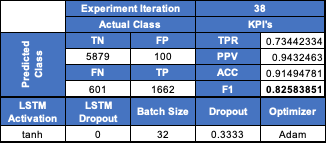

Using New Data Transformation Array for Data (3D) with:
Samples: Number of Data Records
Timesteps: 1
Features: 10

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

####***Load TrainDataSetDL load numpy array npy in binary format***###

In [ ]:
#TrainDataSetDL load numpy array npy in binary format
TrainDataSetDL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetDL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
TrainDataSetDL.shape

In [ ]:
TrainDataSetDL_data,TrainDataSetDL_label=np.split(TrainDataSetDL,[10],axis=1)

In [ ]:
print (TrainDataSetDL_data.shape)
print (TrainDataSetDL_label.shape)

In [ ]:
print(np.count_nonzero(TrainDataSetDL_label == 0))
print(np.count_nonzero(TrainDataSetDL_label == 1))

In [ ]:
TrainDataSetDL_data = np.expand_dims(TrainDataSetDL_data, axis=1)

In [ ]:
print (TrainDataSetDL_data.shape)

###***Final LSTM / DL Similarity Matrix Model***###

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
# Final LSTM / DL Similarity Matrix Model
model = Sequential()
# LSTM Hidden Layer 1
model.add(LSTM(10,
               input_shape =(1,10),
               return_sequences=True,
               activation = ke.activations.tanh,
               recurrent_activation = ke.activations.sigmoid,
               dropout = 0,
               recurrent_dropout = 0
               )
)
# LSTM Hidden Layer 2
model.add(LSTM(10,                    
               return_sequences=True,
               activation = ke.activations.tanh,
               recurrent_activation = ke.activations.sigmoid,
               dropout = 0,
               recurrent_dropout = 0
               )
)
# LSTM Hidden Layer 3
model.add(LSTM(10,
               activation = ke.activations.tanh,
               recurrent_activation = ke.activations.sigmoid,
               dropout = 0,
               recurrent_dropout = 0
               )
)
# Dropout Layer
model.add(Dropout(0.3333
                  )
)
# Output Layer
model.add(Dense(1,
                activation=ke.activations.sigmoid,
                kernel_initializer='normal'
                )
)

In [ ]:
# lr_normalizer funtion from TALOS
def lr_normalizer(lr, optimizer):
    """Assuming a default learning rate 1, rescales the learning rate
    such that learning rates amongst different optimizers are more or less
    equivalent.
    Parameters
    ----------
    lr : float
        The learning rate.
    optimizer : keras optimizer
        The optimizer. For example, Adagrad, Adam, RMSprop.
    """

    from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, Adamax, RMSprop
    from tensorflow.keras.optimizers import Nadam
    #from talos.utils.exceptions import TalosModelError

    if optimizer == Adadelta:
        pass
    elif optimizer == SGD or optimizer == Adagrad:
        lr /= 100.0
    elif optimizer == Adam or optimizer == RMSprop:
        lr /= 1000.0
    elif optimizer == Adamax or optimizer == Nadam:
        lr /= 500.0
    # else:
    #     raise TalosModelError(str(optimizer) + " is not supported by lr_normalizer")

    return lr

In [ ]:
# Final LSTM / DL Similarity Matrix Model Compile

# Learning Rate from lr_normalizer function from TALOS
opt = ke.optimizers.Adam(learning_rate=(0.5/1000))
# compile the model
model.compile(optimizer=opt,
              loss=ke.losses.binary_crossentropy,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
model.summary()

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True)  

In [ ]:
# Final LSTM / DL Similarity Matrix Model Fit
model.fit(x=TrainDataSetDL_data,y=TrainDataSetDL_label,batch_size = 32,epochs = 1000,verbose = 1,validation_split=0.0)

In [ ]:
# Saving Trained Model Final LSTM / DL Similarity Matrix Model LSTM_DL_FINAL

model.save(
    '/content/drive/My Drive/Python/20210411_Final_Trained_Models/LSTM_DL_FINAL/',
    overwrite=True,
    include_optimizer=True,
    save_format='tf',
    signatures=None,
    options=None,
    save_traces=True,
)

###***Loading  Trained Model Final LSTM / DL Similarity Matrix Model LSTM_DL_FINAL***###

In [ ]:
# Loading  Trained Model Final LSTM / DL Similarity Matrix Model LSTM_DL_FINAL
LSTM_DL_FINAL_model = ke.models.load_model('/content/drive/My Drive/Python/20210411_Final_Trained_Models/LSTM_DL_FINAL/',custom_objects={"custom_f1": custom_f1},compile=True)


In [ ]:
LSTM_DL_FINAL_model.get_config()
# Final LSTM /  DL Similarity Matrix Model Compile
opt = ke.optimizers.Adam(learning_rate=(0.5/1000))
# compile the model
LSTM_DL_FINAL_model.compile(optimizer=opt,
              loss=ke.losses.binary_crossentropy,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
LSTM_DL_FINAL_model.summary()

###***Load TestDataSetDL load numpy array npy in binary format***###

In [ ]:
#TestDataSetDL load numpy array npy in binary format
TestDataSetDL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetDL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
TestDataSetDL[0,10].dtype

In [ ]:
TestDataSetDL.shape

In [ ]:
TestDataSetDL_data,TestDataSetDL_label=np.split(TestDataSetDL,[10],axis=1)

In [ ]:
print (TestDataSetDL_data.shape)
print (TestDataSetDL_label.shape)

In [ ]:
print(np.count_nonzero(TestDataSetDL_label == 0))
print(np.count_nonzero(TestDataSetDL_label == 1))

In [ ]:
TestDataSetDL_data = np.expand_dims(TestDataSetDL_data, axis=1)

In [ ]:
print (TestDataSetDL_data.shape)

####***Model Evaluate***####
LSTM DL Similarity Matrix

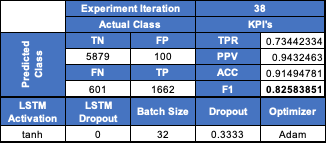

In [ ]:
model.evaluate(x=TestDataSetDL_data,y=TestDataSetDL_label,batch_size=32,verbose=1)

In [ ]:
LSTM_DL_FINAL_model.get_config()

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
LSTM_DL_FINAL_model.evaluate(x=TestDataSetDL_data,y=TestDataSetDL_label,batch_size=32,verbose=1)

###***Load all_gsDataSetDL load numpy array npy in binary format***###

In [ ]:
#all_gsDataSetDL load numpy array npy in binary format
all_gsDataSetDL = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetDL.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
all_gsDataSetDL[0,10].dtype

In [ ]:
all_gsDataSetDL.shape

In [ ]:
all_gsDataSetDL_data,all_gsDataSetDL_label=np.split(all_gsDataSetDL,[10],axis=1)

In [ ]:
print (all_gsDataSetDL_data.shape)
print (all_gsDataSetDL_label.shape)

In [ ]:
print(np.count_nonzero(all_gsDataSetDL_label == 0))
print(np.count_nonzero(all_gsDataSetDL_label == 1))

In [ ]:
all_gsDataSetDL_data = np.expand_dims(all_gsDataSetDL_data, axis=1)

In [ ]:
print (all_gsDataSetDL_data.shape)

####***Model Evaluate***####

In [ ]:
model.evaluate(x=all_gsDataSetDL_data,y=all_gsDataSetDL_label,batch_size=32,verbose=1)

In [ ]:
LSTM_DL_FINAL_model.get_config()

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
LSTM_DL_FINAL_model.evaluate(x=all_gsDataSetDL_data,y=all_gsDataSetDL_label,batch_size=32,verbose=1)

##***LSTM Architecture Final TrainDataSetW2V_501 Data Sets Matrixes***##
2021-04-25
JUHO: LSTM Architecture
Data Sets:
Train: TrainDataSetW2V_501
Test: TestDataSetW2V_501
Golden Record Standard: all_gsDataSetW2V_501
Preprocessing Method: W2V_501 Data Set Matrixes

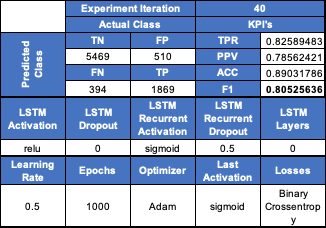

Using New Data Transformation Array for Data (3D) with:
Samples: Number of Data Records
Timesteps: 2
Features: 250
Adding a New LSTM Layer automodelJXHL2
Adding a New Dense Layer before output layer

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

###***Load TrainDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#TrainDataSetW2V_501 load numpy array npy in binary format
TrainDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
TrainDataSetW2V_501[0,10].dtype

In [ ]:
TrainDataSetW2V_501.shape

In [ ]:
TrainDataSetW2V_501_data,TrainDataSetW2V_501_label=np.split(TrainDataSetW2V_501,[500],axis=1)


In [ ]:
print (TrainDataSetW2V_501_data.shape)
print (TrainDataSetW2V_501_label.shape)

In [ ]:
print(np.count_nonzero(TrainDataSetW2V_501_label == 0))
print(np.count_nonzero(TrainDataSetW2V_501_label == 1))

New TrainDataSetW2V_501_data
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TrainDataSetW2V_501_data = np.reshape(TrainDataSetW2V_501_data, (len(TrainDataSetW2V_501_data),2,250))
print (TrainDataSetW2V_501_data.shape)

###***Final LSTM / W2V_501 Matrix Model***###

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking

In [ ]:
%matplotlib inline

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
params = {'activation': [ke.activations.relu],
               'LSTM_activation': [ke.activations.relu],
               'LSTM_recurrent_activation': [ke.activations.sigmoid],
               'LSTM_recurrent_dropout': [0.5],
               'LSTM_dropout': [0],
               'batch_size': [32],
               'dropout': [0],
               'epochs': [1000],
               'first_neuron': [512],
               'hidden_layers': [0],
               'kernel_initializer': ['normal'],
               'last_activation': [ke.activations.sigmoid],
               'losses': [ke.losses.binary_crossentropy],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [ke.optimizers.Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
params

In [ ]:
# Final LSTM / W2V_501 Matrix Model
model = Sequential()
# LSTM Hidden Layer 1
model.add(LSTM(512,
               input_shape =(2,250),
               activation = ke.activations.relu,
               recurrent_activation = ke.activations.sigmoid,
               recurrent_dropout = 0.5,
               dropout = 0,
               unroll = False,
               use_bias = True,                    
               return_sequences=True
               )
)

# LSTM Hidden Layer 2           
model.add(LSTM(512,
               activation = ke.activations.relu,
               recurrent_activation = ke.activations.sigmoid,
               recurrent_dropout = 0.5,
               dropout = 0,
               unroll = False,
               use_bias = True
               )
)

# New Dense Layer Proposed by Teacher Gloria Alvarez
model.add(Dense((512/2),
                activation=ke.activations.sigmoid,
                kernel_initializer='normal'
                )
)

# Output Dense Layer
model.add(Dense(1,
                activation=ke.activations.sigmoid,
                kernel_initializer='normal'
                )
)

In [ ]:
# lr_normalizer funtion from TALOS
def lr_normalizer(lr, optimizer):
    """Assuming a default learning rate 1, rescales the learning rate
    such that learning rates amongst different optimizers are more or less
    equivalent.
    Parameters
    ----------
    lr : float
        The learning rate.
    optimizer : keras optimizer
        The optimizer. For example, Adagrad, Adam, RMSprop.
    """

    from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, Adamax, RMSprop
    from tensorflow.keras.optimizers import Nadam
    #from talos.utils.exceptions import TalosModelError

    if optimizer == Adadelta:
        pass
    elif optimizer == SGD or optimizer == Adagrad:
        lr /= 100.0
    elif optimizer == Adam or optimizer == RMSprop:
        lr /= 1000.0
    elif optimizer == Adamax or optimizer == Nadam:
        lr /= 500.0
    # else:
    #     raise TalosModelError(str(optimizer) + " is not supported by lr_normalizer")

    return lr

In [ ]:
# Final LSTM / W2V_501 Matrix Model Compile

# Learning Rate from lr_normalizer function from TALOS
opt = ke.optimizers.Adam(learning_rate=(0.5/1000))
# compile the model
model.compile(optimizer=opt,
              loss=ke.losses.binary_crossentropy,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
model.summary()

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True)
        

In [ ]:
# Final LSTM / W2V_501 Matrix Model Fit
model.fit(x=TrainDataSetW2V_501_data,y=TrainDataSetW2V_501_label,batch_size = 32,epochs = 1000,verbose = 1,validation_split=0.0)

In [ ]:
print(model.history)

In [ ]:
# Saving Trained Model Final LSTM / W2V_501 Matrix Model MLP_W2V_501_FINAL

model.save(
    '/content/drive/My Drive/Python/20210411_Final_Trained_Models/LSTM_W2V_501_FINAL/',
    overwrite=True,
    include_optimizer=True,
    save_format='tf',
    signatures=None,
    options=None,
    save_traces=True,
)

###***Loading Trained Model Final LSTM / W2V_501 Matrix Model MLP_W2V_501_FINAL***###

In [ ]:
# Loading Trained Model Final LSTM / W2V_501 Matrix Model MLP_W2V_501_FINAL
LSTM_W2V_501_FINAL_model = ke.models.load_model('/content/drive/My Drive/Python/20210411_Final_Trained_Models/LSTM_W2V_501_FINAL/',custom_objects={"custom_f1": custom_f1},compile=True)


In [ ]:
LSTM_W2V_501_FINAL_model.get_config()
# Final LSTM / W2V_501 Matrix Model Compile

# Learning Rate from lr_normalizer function from TALOS
opt = ke.optimizers.Adam(learning_rate=(0.5/1000))
# compile the model
LSTM_W2V_501_FINAL_model.compile(optimizer=opt,
              loss=ke.losses.binary_crossentropy,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
LSTM_W2V_501_FINAL_model.summary()

###***Load TestDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#TestDataSetW2V_501 load numpy array npy in binary format
TestDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
TestDataSetW2V_501[0,10].dtype

In [ ]:
TestDataSetW2V_501.shape

In [ ]:
TestDataSetW2V_501_data,TestDataSetW2V_501_label=np.split(TestDataSetW2V_501,[500],axis=1)


In [ ]:
print (TestDataSetW2V_501_data.shape)
print (TestDataSetW2V_501_label.shape)

In [ ]:
print(np.count_nonzero(TestDataSetW2V_501_label == 0))
print(np.count_nonzero(TestDataSetW2V_501_label == 1))

New TestDataSetW2V_501_data
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TestDataSetW2V_501_data = np.reshape(TestDataSetW2V_501_data, (len(TestDataSetW2V_501_data),2,250))
print (TestDataSetW2V_501_data.shape)

(35564, 2, 250)


In [ ]:
newMatrix2[74231,1,249] == newMatrix[74231,499]

In [ ]:
TrainDataSetW2V_501_data = np.reshape(TrainDataSetW2V_501_data, (len(TrainDataSetW2V_501_data),2,250))
print (TrainDataSetW2V_501_data.shape)

####***Model Evaluate***####

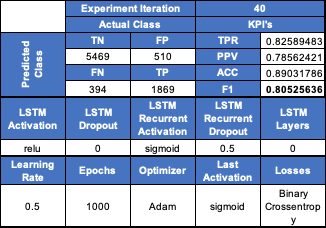

In [ ]:
model.evaluate(x=TestDataSetW2V_501_data,y=TestDataSetW2V_501_label,batch_size=32,verbose=1)

In [ ]:
LSTM_W2V_501_FINAL_model.get_config()

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
LSTM_W2V_501_FINAL_model.evaluate(x=TestDataSetW2V_501_data,y=TestDataSetW2V_501_label,batch_size=32,verbose=1)

###***Load all_gsDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#all_gsDataSetW2V_501 load numpy array npy in binary format
all_gsDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
all_gsDataSetW2V_501[0,10].dtype

In [ ]:
all_gsDataSetW2V_501.shape

In [ ]:
all_gsDataSetW2V_501_data,all_gsDataSetW2V_501_label=np.split(all_gsDataSetW2V_501,[500],axis=1)


In [ ]:
print (all_gsDataSetW2V_501_data.shape)
print (all_gsDataSetW2V_501_label.shape)

In [ ]:
print(np.count_nonzero(all_gsDataSetW2V_501_label == 0))
print(np.count_nonzero(all_gsDataSetW2V_501_label == 1))

New all_gsDataSetW2V_501_data
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
all_gsDataSetW2V_501_data = np.reshape(all_gsDataSetW2V_501_data, (len(all_gsDataSetW2V_501_data),2,250))
print (all_gsDataSetW2V_501_data.shape)

####***Model Evaluate***####

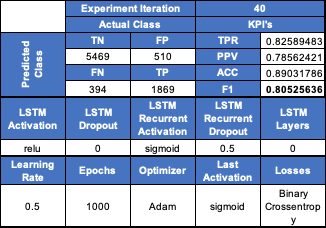

In [ ]:
model.evaluate(x=all_gsDataSetW2V_501_data,y=all_gsDataSetW2V_501_label,batch_size=32,verbose=1)

In [ ]:
LSTM_W2V_501_FINAL_model.get_config()

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
LSTM_W2V_501_FINAL_model.evaluate(x=all_gsDataSetW2V_501_data,y=all_gsDataSetW2V_501_label,batch_size=32,verbose=1)

##***Bi-LSTM Architecture Final TrainDataSetW2V_501 Data Sets Matrixes***##

2021-04-25

JUHO: Bi-LSTM Architecture

Data Sets:

Train: TrainDataSetW2V_501

Test: TestDataSetW2V_501

Golden Record Standard: all_gsDataSetW2V_501

Preprocessing Method: W2V_501 Data Set Matrixes

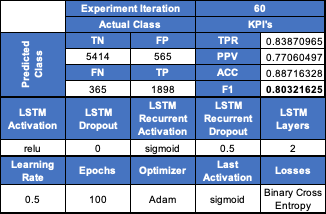

Using New Data Transformation Array for Data (3D) with:
Samples: Number of Data Records
Timesteps: 2
Features: 250
Adding a New LSTM Layer automodelJXHL2
Adding a New Dense Layer before output layer

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1- Import Tensorflow Python Functions for DNN, CNN, RNN. Keras
from tensorflow import keras as ke

In [ ]:
# 3.2 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

###***Load TrainDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#TrainDataSetW2V_501 load numpy array npy in binary format
TrainDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
TrainDataSetW2V_501[0,10].dtype

In [ ]:
TrainDataSetW2V_501.shape

In [ ]:
TrainDataSetW2V_501_data,TrainDataSetW2V_501_label=np.split(TrainDataSetW2V_501,[500],axis=1)


In [ ]:
print (TrainDataSetW2V_501_data.shape)
print (TrainDataSetW2V_501_label.shape)

In [ ]:
print(np.count_nonzero(TrainDataSetW2V_501_label == 0))
print(np.count_nonzero(TrainDataSetW2V_501_label == 1))

New TrainDataSetW2V_501_data
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TrainDataSetW2V_501_data = np.reshape(TrainDataSetW2V_501_data, (len(TrainDataSetW2V_501_data),2,250))
print (TrainDataSetW2V_501_data.shape)

###***Final Bi-LSTM / W2V_501 Matrix Model***###

In [ ]:
import keras as ke

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Input, InputLayer, LSTM, Lambda, Embedding, Masking, Bidirectional

In [ ]:
%matplotlib inline

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
from keras.activations import relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential
from keras.losses import binary_crossentropy, logcosh, BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, KLDivergence, kullback_leibler_divergence
from keras.metrics import AUC, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, KLDivergence, BinaryAccuracy
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as kb

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
params = {'activation': [ke.activations.relu],
               'LSTM_activation': [ke.activations.relu],
               'LSTM_recurrent_activation': [ke.activations.sigmoid],
               'LSTM_recurrent_dropout': [0.5],
               'LSTM_dropout': [0],
               'batch_size': [32],
               'dropout': [0],
               'epochs': [100],
               'first_neuron': [1024],
               'hidden_layers': [2],
               'kernel_initializer': ['normal'],
               'last_activation': [ke.activations.sigmoid],
               'losses': [ke.losses.binary_crossentropy],
               'lr': [0.5],
               'network': ['lstm'],
               'optimizer': [ke.optimizers.Adam],
               'shapes': ['brick'],
               'weight_regulizer':[None],
               'emb_output_dims': [None],
               'shape':['brick']}

In [ ]:
params

In [ ]:
# Final Bi-LSTM / W2V_501 Matrix Model
model = Sequential()
# Bi-LSTM Hidden Layer 1
model.add(Bidirectional(LSTM(1024,
                             activation = ke.activations.relu,
                             recurrent_activation = ke.activations.sigmoid,
                             recurrent_dropout = 0.5,
                             dropout = 0,
                             unroll = False,
                             use_bias = True,
                             return_sequences=True
                             ),
                        input_shape =(2,250)
                        )
)
# Bi-LSTM Hidden Layer 2
model.add(Bidirectional(LSTM(1024,
                             activation = ke.activations.relu,
                             recurrent_activation = ke.activations.sigmoid,
                             recurrent_dropout = 0.5,
                             dropout = 0,
                             unroll = False,
                             use_bias = True
                             )
                        )
)
# New Dense Layer Proposed by Teacher Gloria Alvarez
model.add(Dense(((1024)/2),
                activation=ke.activations.sigmoid,
                kernel_initializer='normal'
                )
)
# Output Layer
model.add(Dense(1,
                activation=ke.activations.sigmoid,
                kernel_initializer='normal'
                )
)

In [ ]:
# lr_normalizer funtion from TALOS
def lr_normalizer(lr, optimizer):
    """Assuming a default learning rate 1, rescales the learning rate
    such that learning rates amongst different optimizers are more or less
    equivalent.
    Parameters
    ----------
    lr : float
        The learning rate.
    optimizer : keras optimizer
        The optimizer. For example, Adagrad, Adam, RMSprop.
    """

    from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, Adamax, RMSprop
    from tensorflow.keras.optimizers import Nadam
    #from talos.utils.exceptions import TalosModelError

    if optimizer == Adadelta:
        pass
    elif optimizer == SGD or optimizer == Adagrad:
        lr /= 100.0
    elif optimizer == Adam or optimizer == RMSprop:
        lr /= 1000.0
    elif optimizer == Adamax or optimizer == Nadam:
        lr /= 500.0
    # else:
    #     raise TalosModelError(str(optimizer) + " is not supported by lr_normalizer")

    return lr

In [ ]:
# Final Bi-LSTM / W2V_501 Matrix Model Compile

# Learning Rate from lr_normalizer function from TALOS
opt = ke.optimizers.Adam(learning_rate=(0.5/1000))
# compile the model
model.compile(optimizer=opt,
              loss=ke.losses.binary_crossentropy,
              metrics=[ke.metrics.Accuracy(name='accuracy'),ke.metrics.BinaryAccuracy(name='binaryAccuracy'),ke.metrics.TruePositives(name='truePositives'),ke.metrics.TrueNegatives(name='trueNegatives'),ke.metrics.FalsePositives(name='falsePositives'),ke.metrics.FalseNegatives(name='falseNegatives'),ke.metrics.Precision(name='precision'),ke.metrics.Recall(name='recall'),custom_f1]
              )
model.summary()

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True)
        

In [ ]:
# Final Bi-LSTM / W2V_501 Matrix Model Fit
model.fit(x=TrainDataSetW2V_501_data,y=TrainDataSetW2V_501_label,batch_size = 32,epochs = 100,verbose = 1,validation_split=0.0)

In [ ]:
# Saving Trained Model Final Bi-LSTM / W2V_501 Matrix Model Bi-LSTM_W2V_501_FINAL

model.save(
    '/content/drive/My Drive/Python/20210411_Final_Trained_Models/Bi-LSTM_W2V_501_FINAL/',
    overwrite=True,
    include_optimizer=True,
    save_format='tf',
    signatures=None,
    options=None,
    save_traces=True,
)

###***Load TestDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#TestDataSetW2V_501 load numpy array npy in binary format
TestDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
TestDataSetW2V_501[0,10].dtype

In [ ]:
TestDataSetW2V_501.shape

In [ ]:
TestDataSetW2V_501_data,TestDataSetW2V_501_label=np.split(TestDataSetW2V_501,[500],axis=1)


In [ ]:
print (TestDataSetW2V_501_data.shape)
print (TestDataSetW2V_501_label.shape)

In [ ]:
print(np.count_nonzero(TestDataSetW2V_501_label == 0))
print(np.count_nonzero(TestDataSetW2V_501_label == 1))

New TestDataSetW2V_501_data
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
TestDataSetW2V_501_data = np.reshape(TestDataSetW2V_501_data, (len(TestDataSetW2V_501_data),2,250))
print (TestDataSetW2V_501_data.shape)

(35564, 2, 250)


In [ ]:
newMatrix2[74231,1,249] == newMatrix[74231,499]

In [ ]:
TrainDataSetW2V_501_data = np.reshape(TrainDataSetW2V_501_data, (len(TrainDataSetW2V_501_data),2,250))
print (TrainDataSetW2V_501_data.shape)

####***Model Evaluate***####

Bi-LSTM

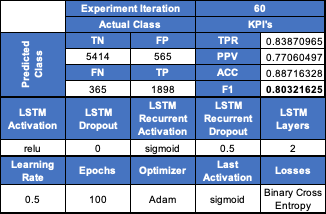

In [ ]:
model.evaluate(x=TestDataSetW2V_501_data,y=TestDataSetW2V_501_label,batch_size=32,verbose=1)

In [ ]:
BiLSTM_W2V_501_FINAL_model.get_config()

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
BiLSTM_W2V_501_FINAL_model.evaluate(x=TestDataSetW2V_501_data,y=TestDataSetW2V_501_label,batch_size=32,verbose=1)

###***Load all_gsDataSetW2V_501 load numpy array npy in binary format***###

In [ ]:
#all_gsDataSetW2V_501 load numpy array npy in binary format
all_gsDataSetW2V_501 = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V_501.npy',mmap_mode=None,allow_pickle=True)


In [ ]:
all_gsDataSetW2V_501[0,10].dtype

In [ ]:
all_gsDataSetW2V_501.shape

In [ ]:
all_gsDataSetW2V_501_data,all_gsDataSetW2V_501_label=np.split(all_gsDataSetW2V_501,[500],axis=1)


In [ ]:
print (all_gsDataSetW2V_501_data.shape)
print (all_gsDataSetW2V_501_label.shape)

In [ ]:
print(np.count_nonzero(all_gsDataSetW2V_501_label == 0))
print(np.count_nonzero(all_gsDataSetW2V_501_label == 1))

New all_gsDataSetW2V_501_data
Reshape Numpy Array to (len(array),2,250)
Used for New Input for LSTM

In [ ]:
all_gsDataSetW2V_501_data = np.reshape(all_gsDataSetW2V_501_data, (len(all_gsDataSetW2V_501_data),2,250))
print (all_gsDataSetW2V_501_data.shape)

####***Model Evaluate***####

Bi-LSTM

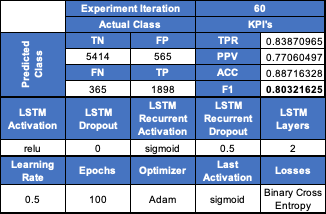

In [ ]:
model.evaluate(x=all_gsDataSetW2V_501_data,y=all_gsDataSetW2V_501_label,batch_size=32,verbose=1)

In [ ]:
BiLSTM_W2V_501_FINAL_model.get_config()

In [ ]:
# 2020-11-08 JXHALLO: Defininng Custom F1 Score Metric
def custom_f1(y_true, y_pred, name='custom_f1'): #taken from old keras source code
    true_positives = kb.sum(kb.round(kb.clip(y_true * y_pred, 0, 1)))
    possible_positives = kb.sum(kb.round(kb.clip(y_true, 0, 1)))
    predicted_positives = kb.sum(kb.round(kb.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + kb.epsilon())
    recall = true_positives / (possible_positives + kb.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+kb.epsilon())
    return f1_val

In [ ]:
BiLSTM_W2V_501_FINAL_model.evaluate(x=all_gsDataSetW2V_501_data,y=all_gsDataSetW2V_501_label,batch_size=32,verbose=1)